In [1]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
import os
%matplotlib inline

LDA

Automatically created module for IPython interactive environment


E:\anaconda\anaconda\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
E:\anaconda\anaconda\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
E:\anaconda\anaconda\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
E:\anaconda\anaconda\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function covariances_ is deprecated; Attribute cov

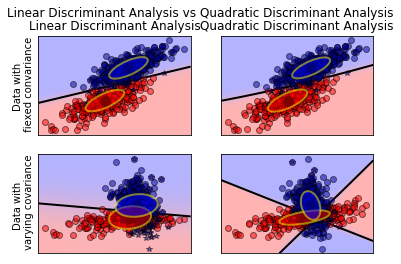

In [21]:
print(__doc__)

from scipy import linalg
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#color map
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',{
    'red':[(0,1,1),(1,0.7,0.7)],
    'green':[(0,0.7,0.7),(1,0.7,0.7)],
    'blue':[(0,0.7,0.7),(1,1,1)]
    })
plt.cm.register_cmap(cmap=cmap)

# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n,dim = 300,2
    np.random.seed(0)
    C = np.array([[0.,-0.23],[0.83,0.23]])
    X = np.r_[np.dot(np.random.randn(n,dim),C),np.dot(np.random.randn(n,dim),C) + np.array([1,1])]
    y = np.hstack((np.zeros(n),np.ones(n)))
    return X,y

def dataset_cov():
    '''Generate 2 Gaussian samples with different covariance matrices'''
    n,dim = 300,2
    np.random.seed(0)
    C = np.array([[0.,-1],[2.5,.7]]) * 2
    X = np.r_[np.dot(np.random.randn(n,dim),C),
             np.dot(np.random.randn(n,dim),C.T) + np.array([1,4])]
    y = np.hstack((np.zeros(n),np.ones(n)))
    return X,y

# plot function 
def plot_data(lda,X,y,y_pred,fig_index):
    splot = plt.subplot(2,2,fig_index)
    if fig_index ==1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with \n fiexed convariance')
    elif fig_index ==2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index ==3:
        plt.ylabel('Data with \n varying covariance')
        
    tp = (y==y_pred)
    tp0,tp1 = tp[y==0],tp[y==1]
    X0,X1 = X[y==0],X[y==1]
    X0_tp,X0_fp = X0[tp0],X1[~tp0]
    X1_tp,X1_fp = X1[tp1],X1[~tp1]
    
    alpha = .5
    # class 0
    plt.plot(X0_tp[:,0],X0_tp[:,1],'o',alpha=alpha,color='red',markeredgecolor='k')
    plt.plot(X0_fp[:,0],X0_fp[:,1],'*',alpha=alpha,color='#990000',markeredgecolor='k')
    
    # class 1
    plt.plot(X1_tp[:,0],X1_tp[:,1],'o',alpha=alpha,color='#000099',markeredgecolor='k')
    plt.plot(X1_fp[:,0],X1_fp[:,1],'*',alpha=alpha,color='#000099',markeredgecolor='k')
    
    # class 0 and 1 areas
    nx,ny = 200,100
    x_min,x_max = plt.xlim()
    y_min,y_max = plt.ylim()
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,nx),np.linspace(y_min,y_max,ny))
    Z = lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    plt.pcolormesh(xx,yy,Z,cmap='red_blue_classes',norm=colors.Normalize(0.,1))
    plt.contour(xx,yy,Z,[0.5],linewidths=2,colors='k')
    
    # means
    plt.plot(lda.means_[0][0],lda.means_[0][1],'o',color='black',
             markersize=10,markeredgecolor='k')
    plt.plot(lda.means_[1][0],lda.means_[1][1],'o',color='black',
            markersize=10,markeredgecolor='k')
    
    return splot

def plot_ellipse(splot,mean,cov,color):
    v,w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi
    
    ell = matplotlib.patches.Ellipse(mean,2 * v[0] ** 0.5,2 * v[1] **0.5,
                                    180+ angle,facecolor=color,edgecolor='yellow',
                                    linewidth=2,zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())
    
def plot_lda_cov(lda,splot):
    plot_ellipse(splot,lda.means_[0],lda.covariance_,'red')
    plot_ellipse(splot,lda.means_[1],lda.covariance_,'blue')
    
def plot_qda_cov(qda,splot):
    plot_ellipse(splot,qda.means_[0],qda.covariances_[0],'red')
    plot_ellipse(splot,qda.means_[1],qda.covariances_[1],'blue')
    
for i,(X,y) in enumerate([dataset_fixed_cov(),dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver='svd',store_covariance=True)
    y_pred = lda.fit(X,y).predict(X)
    splot = plot_data(lda,X,y,y_pred,fig_index=2 * i +1)
    plot_lda_cov(lda,splot)
    plt.axis('tight')
    
    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X,y).predict(X)
    splot = plot_data(qda,X,y,y_pred,fig_index=2*i+2)
    plot_qda_cov(qda,splot)
    plt.axis('tight')
    
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis')
plt.show()
    
    
    
    

explain variance ration (first two components): [ 0.92461621  0.05301557]


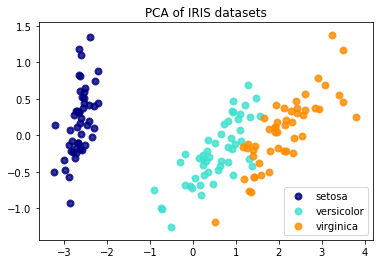

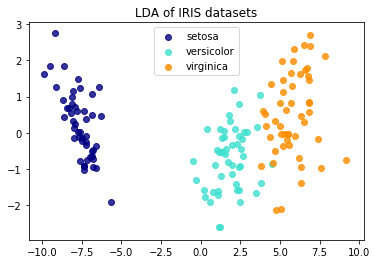

In [26]:
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X,y).transform(X)

print('explain variance ration (first two components): %s'%str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy','turquoise','darkorange']
lw =2

for color ,i ,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],color=color,alpha=.8,lw=lw,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('PCA of IRIS datasets')

plt.figure()
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r2[y==i,0],X_r2[y==i,1],color=color,alpha=0.8,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('LDA of IRIS datasets')

plt.show()


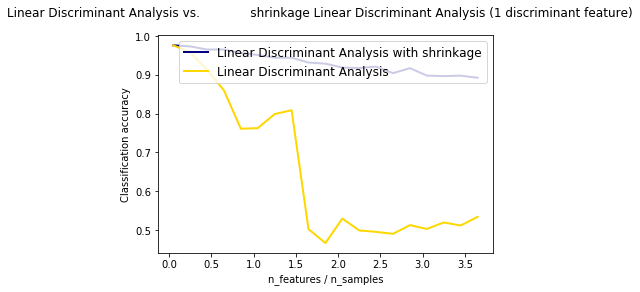

In [32]:
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_train = 20
n_test = 200
n_averages = 50
n_features_max = 75
step = 4

def generate_data(n_samples,n_features):
    X,y = make_blobs(n_samples=n_samples,n_features =1,centers=[[-2],[2]])
    
    if n_features >1:
        X = np.hstack([X,np.random.randn(n_samples,n_features-1)])
    return X,y

acc_clf1,acc_clf2 = [] ,[]
n_features_range = range(1,n_features_max +1,step)
for n_features in n_features_range:
    score_clf1,score_clf2 = 0,0
    for _ in range(n_averages):
        X,y = generate_data(n_train,n_features)
        clf1 = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(X,y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr',shrinkage=None).fit(X,y)
        X,y = generate_data(n_test,n_features)
        score_clf1 +=clf1.score(X,y)
        score_clf2 +=clf2.score(X,y)
    acc_clf1.append(score_clf1/n_averages)
    acc_clf2.append(score_clf2/n_averages)
    
features_samples_ratio = np.array(n_features_range) /n_train

plt.plot(features_samples_ratio,acc_clf1,lw=2,label='Linear Discriminant Analysis with shrinkage',color='navy')
plt.plot(features_samples_ratio,acc_clf2,lw=2,label='Linear Discriminant Analysis',color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1,prop={'size':12})
plt.suptitle('Linear Discriminant Analysis vs.\
             shrinkage Linear Discriminant Analysis (1 discriminant feature)')
plt.show()

kernel ridge regression

SVR complexity and bandwith selected and model fitted in 1.727 s.
KRR complexity and bandwith selected and model fitted in 3.699 s.
Support vector ratio: 0.320
SVR prediction for 10000 inputs in 0.020 s
KRR prediction for 10000 inputs in 0.350 s


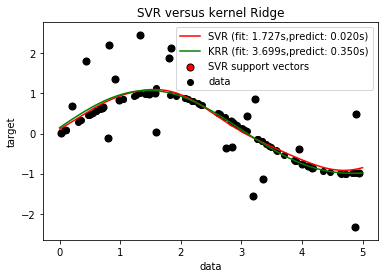

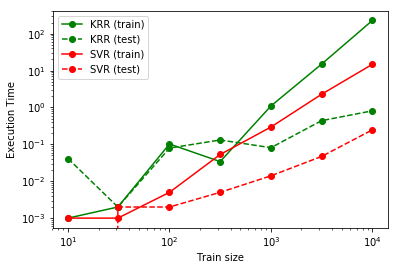

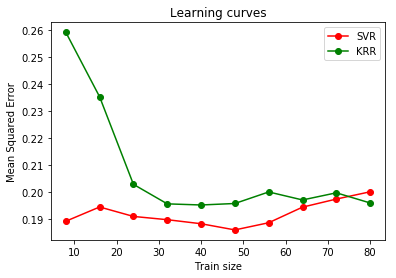

In [6]:
import time 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

rng = np.random.RandomState(0)

#Generate sample data
x = 5 * rng.rand(10000,1)
y = np.sin(x).ravel()

# add noise
y[::5] += 3 * (0.5 - rng.rand(x.shape[0] // 5))

x_plot = np.linspace(0,5,10000)[:,None]

# fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf',gamma=0.1),cv=5,param_grid={'C':[1e0,1e1,1e2,1e3],
                                                                'gamma':np.logspace(-2,2,5)})
kr = GridSearchCV(KernelRidge(kernel='rbf',gamma=0.1),cv=5,
                  param_grid={'alpha':[1e0,0.1,1e-2,1e-3],
                             'gamma':np.logspace(-2,2,5)})
t0 = time.time()
svr.fit(x[:train_size],y[:train_size])
svr_fit = time.time() - t0
print('SVR complexity and bandwith selected and model fitted in %.3f s.'%svr_fit)

t0 =time.time()
kr.fit(x[:train_size],y[:train_size])
kr_fit = time.time() - t0
print('KRR complexity and bandwith selected and model fitted in %.3f s.'%kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] /train_size
print('Support vector ratio: %.3f'%sv_ratio)

t0 = time.time()
y_svr = svr.predict(x_plot)
svr_predict = time.time() - t0
print('SVR prediction for %d inputs in %.3f s'%(x_plot.shape[0],svr_predict))

t0 = time.time()
y_kr = kr.predict(x_plot)
kr_predict = time.time() - t0
print('KRR prediction for %d inputs in %.3f s'%(x_plot.shape[0],kr_predict))

# look at the rssults
sv_ind = svr.best_estimator_.support_
plt.scatter(x[sv_ind],y[sv_ind],c='r',s=50,label='SVR support vectors',
          edgecolors=(0,0,0))
plt.scatter(x[:100],y[:100],c='k',label='data',edgecolors=(0,0,0))
plt.plot(x_plot,y_svr,c='r',label='SVR (fit: %.3fs,predict: %.3fs)'%(svr_fit,svr_predict))
plt.plot(x_plot,y_kr,c='g',label='KRR (fit: %.3fs,predict: %.3fs)'%(kr_fit,kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus kernel Ridge')
plt.legend()

# visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000,1)
y = np.sin(X).ravel()
y[::5] += 3 * (.5 -rng.rand(X.shape[0] // 5))
sizes = np.logspace(1,4,7,dtype=np.int)
for name ,estimator in {'KRR':KernelRidge(kernel='rbf',alpha=0.1,gamma=10),
                      'SVR':SVR(kernel='rbf',C=1e1,gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time() 
        estimator.fit(X[:train_test_size],y[:train_test_size])
        train_time.append(time.time()- t0)
        
        t0 = time.time()
        estimator.predict(x_plot[:1000])
        test_time.append(time.time()-t0)
        
    plt.plot(sizes,train_time,'o-',color='r' if name == 'SVR' else 'g',
            label='%s (train)'%name)
    plt.plot(sizes,test_time,'o--',color='r' if name == 'SVR' else 'g',
            label='%s (test)' % name)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Train size')
plt.ylabel('Execution Time')
plt.legend(loc='best')

# visualize learning curves
plt.figure()

svr = SVR(kernel='rbf',C=1e1,gamma=0.1)
kr = KernelRidge(kernel='rbf',alpha=0.1,gamma=0.1)
train_sizes,train_scores_svr,test_scores_svr = \
    learning_curve(svr,X[:100],y[:100],train_sizes=np.linspace(0.1,1,10),
                  scoring='neg_mean_squared_error',cv=5)
train_sizes_abs,train_scores_kr,test_scores_kr = \
    learning_curve(kr,X[:100],y[:100],train_sizes=np.linspace(0.1,1,10),
                  scoring='neg_mean_squared_error',cv=5)

plt.plot(train_sizes,-test_scores_svr.mean(1),'o-',color='r',label='SVR')
plt.plot(train_sizes_abs,-test_scores_kr.mean(1),'o-',color='g',label='KRR')
plt.xlabel('Train size')
plt.ylabel('Mean Squared Error')
plt.title('Learning curves')
plt.legend(loc='best')

plt.show()

svm

In [8]:
from sklearn import svm
X = [[0,0],[1,1]]
y = [0,1]
clf = svm.SVC()
clf.fit(X,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.predict([[2.,2.]])

array([1])

In [10]:
clf.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

In [12]:
clf.support_

array([0, 1])

In [13]:
clf.n_support_

array([1, 1])

In [14]:
X = [[0],[1],[2],[3]]
y = [0,1,2,3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
dec = clf.decision_function([[1]])
dec.shape[1]

6

In [17]:
clf.decision_function_shape='ovr'
dec.shape[1]

6

In [18]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X,y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [28]:
clf = svm.SVC(probability=True)
clf.fit(X,y)
dec = clf.predict_proba([[1]])
dec

array([[ 0.2550524 ,  0.16488868,  0.25497241,  0.3250865 ]])

E:\anaconda\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


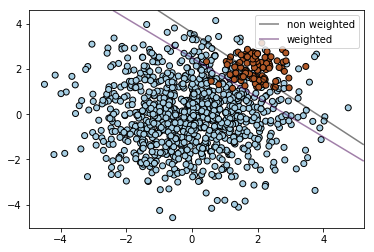

In [33]:
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1,2),0.5 * rng.randn(n_samples_2,2)+[2,2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

clf = svm.SVC(kernel='linear',C =1.0)
clf.fit(X,y)

wclf = svm.SVC(kernel='linear',class_weight={1:10})
wclf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,edgecolor='k')
plt.legend()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
Z = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX,YY,Z,color='r',levels=[0],alpha=0.5,linestyle=['-'])

plt.legend([a.collections[0],b.collections[0]],['non weighted','weighted'],loc='upper right')

In [34]:
a.collections

<a list of 1 mcoll.LineCollection objects>

In [35]:
print(a.collections)

<a list of 1 mcoll.LineCollection objects>


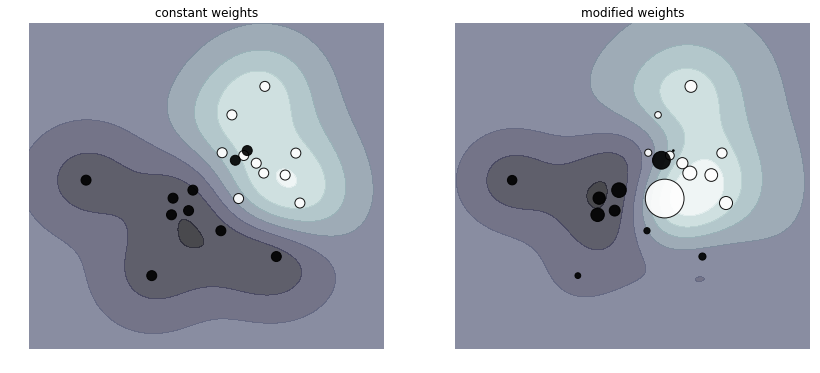

In [3]:
from sklearn import svm

def plot_decision_function(classifier,sample_weight,axis,title):
    #plot the decision function
    xx,yy = np.meshgrid(np.linspace(-4,5,500),np.linspace(-4,5,500))
    Z = classifier.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the line,points and nearest vectors to the plane
    axis.contourf(xx,yy,Z,alpha=0.75,cmap=plt.cm.bone)
    axis.scatter(X[:,0],X[:,1],c=y,s = 100 * sample_weight,alpha=0.9,
                cmap=plt.cm.bone,edgecolor='black')
    axis.axis('off')
    axis.set_title(title)
    
# create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10,2) + [1,1],np.random.randn(10,2)]
y = [1] * 10 +[-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
#and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] = 15

# for reference ,first fit without class weights
clf_weights = svm.SVC()
clf_weights.fit(X,y,sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC()
clf_no_weights.fit(X,y)

fig,axes = plt.subplots(1,2,figsize=(14,6))
plot_decision_function(clf_no_weights,sample_weight_constant,axes[0],'constant weights')
plot_decision_function(clf_weights,sample_weight_last_ten,axes[1],'modified weights')

plt.show()

Automatically created module for IPython interactive environment


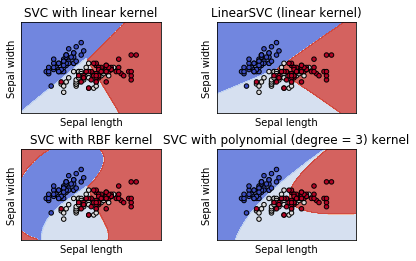

In [6]:
print(__doc__)

from sklearn import svm,datasets

def make_meshgrid(x,y,h=0.02):
    x_min ,x_max = x.min() -1 ,x.max() +1
    y_min ,y_max = y.min() -1 ,y.max() +1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
    
    return xx,yy

def plot_contours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out

# import data
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

C = 1.0
models = (
    svm.SVC(kernel='linear',C=C),
    svm.LinearSVC(C=C),
    svm.SVC(kernel='rbf',gamma=0.7,C=C),
    svm.SVC(kernel='poly',degree=3,C=C))
models = (clf.fit(X,y) for clf in models)

titles = ('SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree = 3) kernel'
        )

fig ,sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

X0,X1 = X[:,0],X[:,1]
xx,yy = make_meshgrid(X0,X1)

for clf ,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

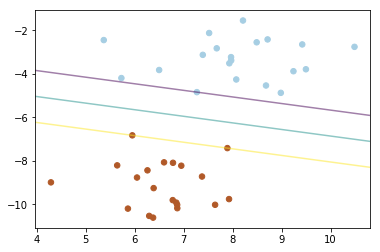

In [11]:
from sklearn import svm
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=40,centers=2,random_state=6)

clf = svm.SVC(kernel='linear',C=1000)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.c_[XX.ravel(),YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX,YY,Z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,lw=1,facecolors='None')

plt.show()

In [12]:
from sklearn import svm

X = [[0,0],[2,2]]
y = [0.5,2.5]
clf = svm.SVR()
clf.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
clf.predict([[1,1]])

array([ 1.5])

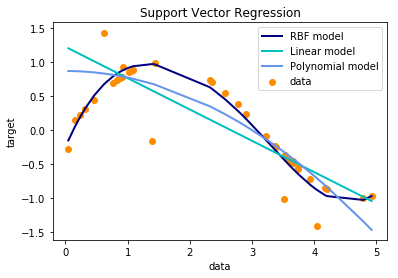

In [17]:
from sklearn.svm import SVR

X = np.sort(5 * np.random.rand(40,1),axis=0)
y = np.sin(X).ravel()

y[::5] +=3 * (0.5 - np.random.rand(8))

svr_rbf = SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_lin = SVR(kernel='linear',C=1e3)
svr_poly = SVR(kernel='poly',C=1e3,degree=2)
y_rbf = svr_rbf.fit(X,y).predict(X)
y_lin = svr_lin.fit(X,y).predict(X)
y_poly = svr_poly.fit(X,y).predict(X)

lw = 2
plt.scatter(X,y,color='darkorange',label='data')
plt.plot(X,y_rbf,color='navy',lw=lw,label='RBF model')
plt.plot(X,y_lin,color='c',lw=lw,label='Linear model')
plt.plot(X,y_poly,color='cornflowerblue',lw=lw,label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


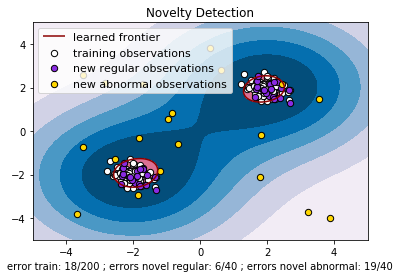

In [22]:
import matplotlib.font_manager
from sklearn import svm

xx,yy = np.meshgrid(np.linspace(-5,5,500),np.linspace(-5,5,500))

X = .3 * np.random.randn(100,2)
X_train = np.r_[X+2,X-2]
X = .3 * np.random.randn(20,2)
X_test = np.r_[X+2,X-2]

X_outliers = np.random.uniform(low=-4,high=4,size=(20,2))

clf = svm.OneClassSVM(nu=0.1,kernel='rbf',gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train ==-1].size
n_error_test = y_pred_test[y_pred_test==-1].size
n_error_outliers = y_pred_outliers[y_pred_outliers==-1].size

Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title('Novelty Detection')
plt.contourf(xx,yy,Z,levels=np.linspace(Z.min(),0,7),cmap=plt.cm.PuBu)
a = plt.contour(xx,yy,Z,levels=[0],lw=2,colors='darkred')
plt.contourf(xx,yy,Z,levels=[0,Z.max()],colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()


In [23]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [25]:
import mpl_toolkits

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [26]:
def my_kernel(X,Y):
    #X: n_samples1,n_features
    #Y: n_samples2,n_featuers
    #return n_samples1,n_samples2
    return np.dot(X,Y.T)
clf = svm.SVC(kernel=my_kernel)

In [27]:
X = np.array([[0, 0], [1, 1]])
y = [0, 1]
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram = np.dot(X, X.T)
clf.fit(gram, y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
clf.predict(gram)

array([0, 1])

Stochastic Gradient Descent

Warning: Make sure you permute(shuffle) your training data before fitting the model or use shuffle = True to shuffle after each iteration.

In [2]:
from sklearn.linear_model import SGDClassifier
X = [[0,0.],[1,1]]
y = [0,1]

clf = SGDClassifier(loss='hinge',penalty='l2')
clf.fit(X,y)

E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [3]:
clf.predict([[2,2]])

array([1])

In [4]:
clf.coef_

array([[ 9.91080278,  9.91080278]])

In [5]:
clf.intercept_

array([-9.99002993])

In [6]:
clf.decision_function([[2.,2]])


array([ 29.65318117])

In [8]:
clf = SGDClassifier(loss='log').fit(X,y)
clf.predict_proba([[1,1.]])


E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[ 0.00459185,  0.99540815]])

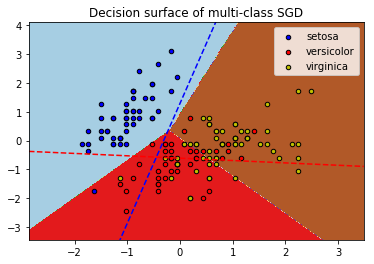

In [12]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

colors = 'bry'

#shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X- mean) / std

h =0.02

clf = SGDClassifier(alpha=0.001,max_iter=100).fit(X,y)

x_min,x_max = X[:,0].min() -1 ,X[:,0].max() +1
y_min,y_max = X[:,1].min() -1 ,X[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
plt.axis('tight')

for i,color in zip(clf.classes_,colors):
    idx = np.where(y==i)
    plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
               cmap=plt.cm.Paired,edgecolor='black',s=20)
plt.title('Decision surface of multi-class SGD')
plt.axis('tight')

xmin,xmax = plt.xlim()
ymin,ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c,color):
    def line(x0):
        return (-(x0 * coef[c,0]) - intercept[c] / coef[c,1])
    plt.plot([xmin,xmax],[line(xmin),line(xmax)],
            ls='--',color=color)
    
for i ,color in zip(clf.classes_,colors):
    plot_hyperplane(i,color)
    
plt.legend()
plt.show()
    

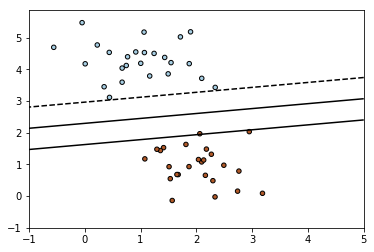

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

X,Y= make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

clf = SGDClassifier(loss='hinge',alpha=0.01,max_iter=200,fit_intercept=True)
clf.fit(X,y)

xx = np.linspace(-1,5,10)
yy = np.linspace(-1,5,10)

X1,X2 = np.meshgrid(xx,yy)
Z = np.empty(X1.shape)

for (i,j),val in np.ndenumerate(X1):
    x1 = val 
    x2 = X2[i,j]
    p = clf.decision_function([[x1,x2]])
    Z[i,j] = p[0]
levels = [-1,0,1.]
linestyles = ['dashed','solid','dashed']
colors = 'k'
plt.contour(X1,X2,Z,levels,colors =colors,linestyle=linestyles)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired,edgecolor='black',s=20)

plt.axis('tight')
plt.show()

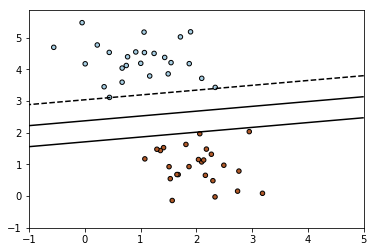

In [19]:
X,Y= make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

clf = SGDClassifier(loss='hinge',alpha=0.01,max_iter=200,fit_intercept=True)
clf.fit(X,y)

xx = np.linspace(-1,5,10)
yy = np.linspace(-1,5,10)

#X1,X2 = np.meshgrid(xx,yy)
#Z = np.empty(X1.shape)
XX,YY = np.meshgrid(xx,yy)
xy = np.c_[XX.ravel(),YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)
#for (i,j),val in np.ndenumerate(X1):
#    x1 = val 
#    x2 = X2[i,j]
#    p = clf.decision_function([[x1,x2]])
#    Z[i,j] = p[0]
levels = [-1,0,1.]
linestyles = ['dashed','solid','dashed']
colors = 'k'
plt.contour(X1,X2,Z,levels,colors =colors,linestyle=linestyles)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired,edgecolor='black',s=20)

plt.axis('tight')
plt.show()


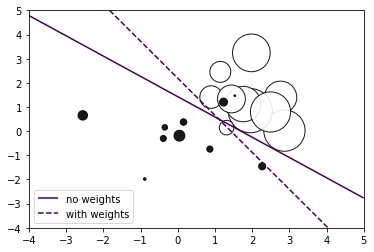

In [26]:
from sklearn import linear_model

np.random.seed(0)
X = np.r_[np.random.randn(10,2) + [1,1],np.random.randn(10,2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))

sample_weight[:10] *= 10

xx,yy = np.meshgrid(np.linspace(-4,5,500),np.linspace(-4,5,500))
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=sample_weight,alpha=0.9,cmap=plt.cm.bone,
           edgecolor='black')
clf = linear_model.SGDClassifier(alpha=0.01,max_iter=100)
clf.fit(X,y)
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx,yy,Z,levels=[0],linestyles=['solid'])

clf = linear_model.SGDClassifier(alpha=0.01,max_iter=100)
clf.fit(X,y,sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

samples_weights = plt.contour(xx,yy,Z,levels=[0],linestyles=['dashed'])

plt.legend([no_weights.collections[0],samples_weights.collections[0]],
          ['no weights','with weights'],loc='lower left')

plt.xticks()
plt.yticks()
plt.show()

E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\anaconda\anaconda\lib\site-packages\sklearn\linear_

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


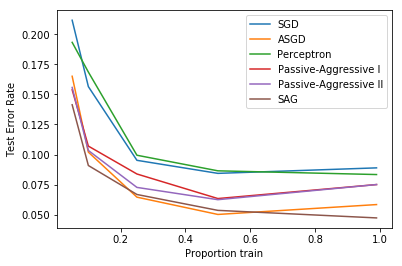

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier ,Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95,0.90,0.75,0.50,0.01]
rounds = 20
digits = datasets.load_digits()
X,y = digits.data,digits.target

classifiers = [
    ('SGD',SGDClassifier()),
    ('ASGD',SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

In [3]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = linear_model.SGDRegressor()
clf.fit(X, y)


E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Nearest Neighbors

In [5]:
from sklearn.neighbors import NearestNeighbors

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
nbrs = NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(X)

distances,indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [6]:
distances

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356]])

In [7]:
nbrs.kneighbors_graph(X).toarray()

array([[ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

In [9]:
from sklearn.neighbors import KDTree

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
kdt = KDTree(X,leaf_size=30,metric='euclidean')
kdt.query(X,k=2,return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

Automatically created module for IPython interactive environment


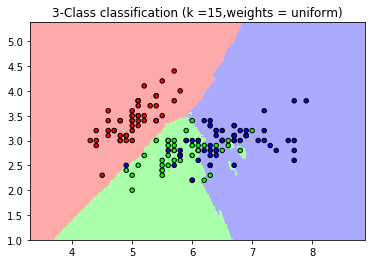

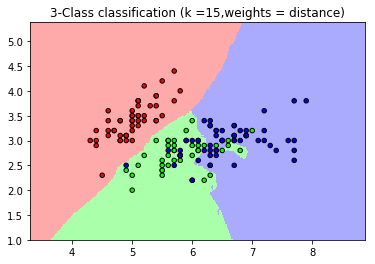

In [11]:
print(__doc__)

from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets

n_neighbors = 15

#import data
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

h = 0.02
# create color maps
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(X,y)
    
    x_min,x_max = X[:,0].min() -1 ,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1 ,X[:,1].max() +1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title('3-Class classification (k =%i,weights = %s)'%(n_neighbors,weights))

plt.show()

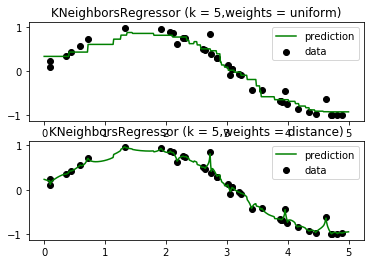

In [13]:
from sklearn import neighbors

np.random.seed(0)

X = np.sort(5 * np.random.rand(40,1),axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(X).ravel()

y[::5] += 1 * (0.5 - np.random.rand(8))

n_neighbors = 5

for i,weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors,weights=weights)
    y_ = knn.fit(X,y).predict(T)
    
    plt.subplot(2,1,i+1)
    plt.scatter(X,y,c='k',label='data')
    plt.plot(T,y_,c='g',label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title('KNeighborsRegressor (k = %i,weights = %s)'%(n_neighbors,weights))
    
plt.show()
    

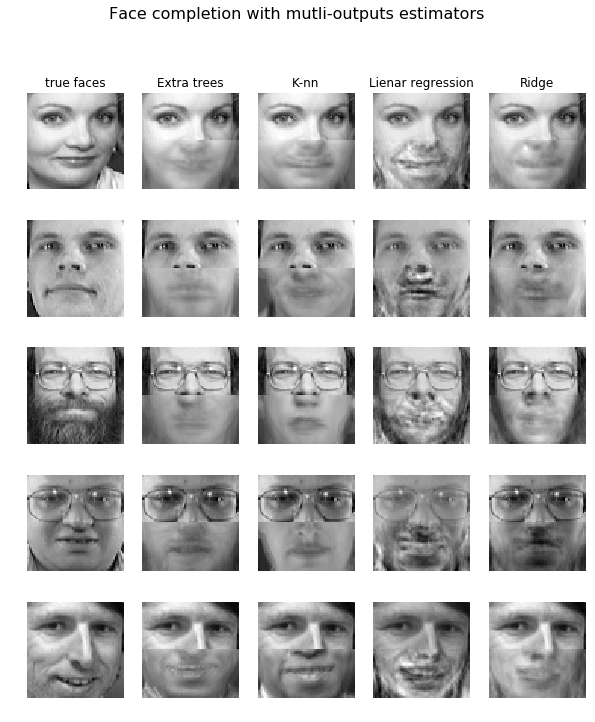

In [20]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

#load data
data = fetch_olivetti_faces(data_home='E:/python_work/handson_ml/datasets')
targets = data.target

data = data.images.reshape((len(data.images),-1))
train = data[targets < 30]
test = data[targets >= 30]

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0],size=(n_faces,))

test = test[face_ids,:]

n_pixels = data.shape[1]

X_train = train[:,:(n_pixels +1)//2]
y_train = train[:,n_pixels//2:]
X_test = test[:,:(n_pixels +1)//2]
y_test = test[:,n_pixels //2:]

ESTIMATORS = {
    'Extra trees':ExtraTreesRegressor(n_estimators=10,max_features=32,
                                     random_state=0),
    'K-nn':KNeighborsRegressor(),
    'Lienar regression':LinearRegression(),
    'Ridge':RidgeCV()   
}

y_test_predict = dict()
for name,estimator in ESTIMATORS.items():
    estimator.fit(X_train,y_train)
    y_test_predict[name] = estimator.predict(X_test)
    
image_shape = (64,64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols,2.26 * n_faces))
plt.suptitle('Face completion with mutli-outputs estimators',size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i],y_test[i]))
    if i :
        sub = plt.subplot(n_faces,n_cols,i * n_cols +1)
    else:
        sub = plt.subplot(n_faces,n_cols,i*n_cols +1,title='true faces')
    
    sub.axis('off')
    sub.imshow(true_face.reshape(image_shape),cmap=plt.cm.gray,interpolation='nearest')
    for j ,est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i],y_test_predict[est][i]))
        if i:
            sub= plt.subplot(n_faces,n_cols,i*n_cols+2+j)
        else:
            sub = plt.subplot(n_faces,n_cols,i *n_cols+2+j,title=est)
        sub.axis('off')
        sub.imshow(completed_face.reshape(image_shape),cmap=plt.cm.gray,interpolation='nearest')
        
plt.show()

In [21]:
targets

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [22]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([1,1,1,2,2,2])
clf = NearestCentroid()
clf.fit(X,y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [23]:
print(clf.predict([[-0.8,-1]]))

[1]


Automatically created module for IPython interactive environment
None 0.813333333333
0.2 0.82


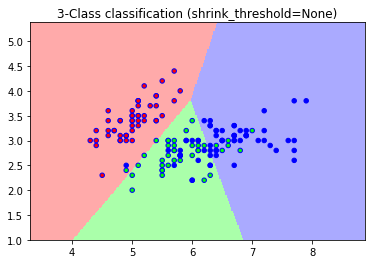

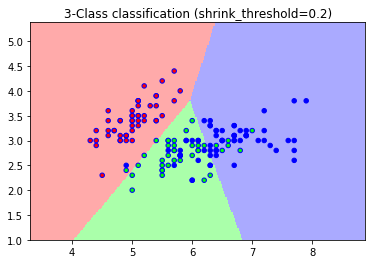

In [24]:
print(__doc__)

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# import data
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

h = .02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for shrinkage in [None,.2]:
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    print(shrinkage,np.mean(y==y_pred))
    x_min,x_max = X[:,0].min()-1 ,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1,X[:,1].max() +1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='b',s=20)
    plt.title('3-Class classification (shrink_threshold=%r)'%shrinkage)
    plt.axis('tight')
    
plt.show()


 Gaussian Processes

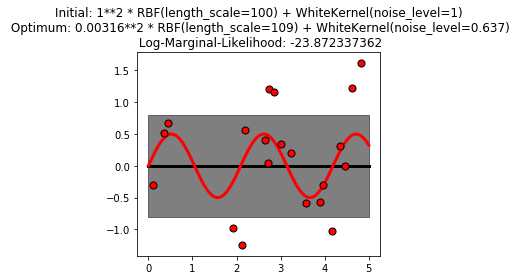

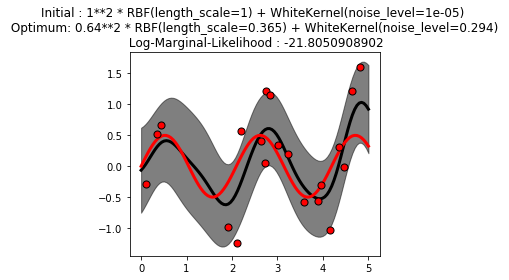

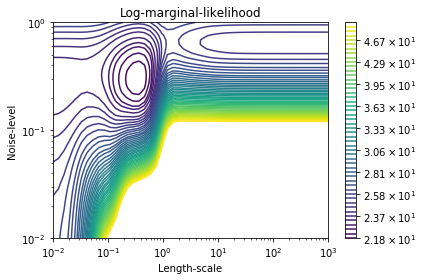

In [31]:
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

rng = np.random.RandomState(0)
X = rng.uniform(0,5,20)[:,np.newaxis]
y = 0.5 * np.sin(3 * X[:,0]) + rng.normal(0,0.5,X.shape[0])
# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0,length_scale_bounds=(1e-2,1e3))\
    +WhiteKernel(noise_level=1,noise_level_bounds=(1e-10,1e3))
gp = GaussianProcessRegressor(kernel=kernel,alpha=0.0).fit(X,y)

X_ = np.linspace(0,5,100)
y_mean,y_cov = gp.predict(X_[:,np.newaxis],return_cov=True)
plt.plot(X_,y_mean,'k',lw=3,zorder=9)
plt.fill_between(X_,y_mean - np.sqrt(np.diag(y_cov)),
                y_mean + np.sqrt(np.diag(y_cov)),
                alpha=0.5,color='k')
plt.plot(X_,.5 * np.sin(3*X_),'r',lw=3,zorder=9)
plt.scatter(X[:,0],y,c='r',s=50,zorder=10,edgecolors=(0,0,0))
plt.title('Initial: %s\n Optimum: %s\n Log-Marginal-Likelihood: %s'
          %(kernel,gp.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e3))\
    + WhiteKernel(noise_level=1e-5,noise_level_bounds=(1e-10,1e1))
gp = GaussianProcessRegressor(kernel=kernel,alpha=0.0).fit(X,y)
X_ = np.linspace(0,5,100)
y_mean,y_cov = gp.predict(X_[:,np.newaxis],return_cov=True)
plt.plot(X_,y_mean,'k',lw=3,zorder=9)
plt.fill_between(X_,y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5,color='k')
plt.plot(X_,0.5*np.sin(3*X_),'r',lw=3,zorder=9)
plt.scatter(X[:,0],y,c='r',s=50,zorder=10,edgecolors=(0,0,0))
plt.title('Initial : %s \n Optimum: % s \n Log-Marginal-Likelihood : %s'
          %(kernel,gp.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

#plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2,3,49)
theta1 = np.logspace(-2,0,50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin,vmax = (-LML).min(),(-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Length-scale')
plt.ylabel('Noise-level')
plt.title('Log-marginal-likelihood')
plt.tight_layout()

plt.show()


Time for KRR fitting: 30.401
Time for GPR fitting : 0.489
Time for KRR prediction: 0.149
Time for GPR prediction: 0.233
Time for GPR prediction with standard-deviation: 0.390


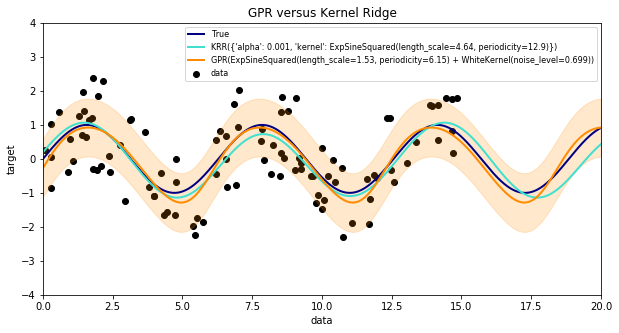

In [2]:
import time
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared

rng = np.random.RandomState(0)
X = 15 * rng.rand(100,1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))
#Fitting 
param_grid = {'alpha':[1e0,1e-1,1e-2,1e-3],
             'kernel':[ExpSineSquared(l,p) for l in np.logspace(-2,2,10) for p in np.logspace(0,2,10)]}
kr = GridSearchCV(KernelRidge(),cv=5,param_grid=param_grid)
stime = time.time()
kr.fit(X,y)
print('Time for KRR fitting: %.3f'%(time.time() -stime))

gp_kernel = ExpSineSquared(1.,5,periodicity_bounds=(1e-2,1e1)) \
    + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X,y)
print('Time for GPR fitting : %.3f'%(time.time()-stime))

# Predict using kernel ridge
X_plot = np.linspace(0,20,10000)[:,None]
stime = time.time()
y_kr = kr.predict(X_plot)
print('Time for KRR prediction: %.3f'%(time.time() -stime))
#Predict using gaussian process regressor
stime = time.time()
y_gpr = gpr.predict(X_plot,return_std = False)
print('Time for GPR prediction: %.3f'%(time.time()-stime))

stime = time.time()
y_gpr,y_std = gpr.predict(X_plot,return_std=True)
print('Time for GPR prediction with standard-deviation: %.3f'%(time.time()-stime))

#plot results
plt.figure(figsize=(10,5))
lw = 2
plt.scatter(X,y,c='k',label='data')
plt.plot(X_plot,np.sin(X_plot),color='navy',lw=lw,label='True')
plt.plot(X_plot,y_kr,color='turquoise',lw=lw,label='KRR(%s)'%kr.best_params_)
plt.plot(X_plot,y_gpr,color='darkorange',lw=lw,label='GPR(%s)'%gpr.kernel_)
plt.fill_between(X_plot[:,0],y_gpr-y_std,y_gpr+y_std,color='darkorange',alpha=.2)
plt.xlabel('data')
plt.ylabel('target')
plt.xlim(0,20)
plt.ylim(-4,4)
plt.title('GPR versus Kernel Ridge')
plt.legend(loc='best',scatterpoints=1,prop={'size':8})
plt.show()
      

      


In [3]:
34.4**2 * RBF(length_scale=41.8)
+ 3.27**2 * RBF(length_scale=180) * ExpSineSquared(length_scale=1.44,
                                                   periodicity=1)
+ 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
+ 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336)

NameError: name 'RBF' is not defined

GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -87.034

Learned kernel: 34.5**2 * RBF(length_scale=41.8) + 3.27**2 * RBF(length_scale=180) * ExpSineSquared(length_scale=1.44, periodicity=1) + 0.446**2 * RationalQuadratic(alpha=17.6, length_scale=0.957) + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336)
Log-marginal-likelihood: -83.214


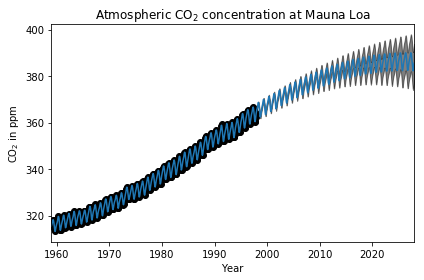

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel,RationalQuadratic,ExpSineSquared
from sklearn.datasets import fetch_mldata

data = fetch_mldata('mauna-loa-atmospheric-co2',data_home='E:/python_work/handson_ml/datasets').data
X = data[:, [1]]
y = data[:, 0]

# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Kernel with optimized parameters
k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, np.inf))  # noise terms
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(X, y)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy : 1.000 (initial) 1.000(optimized)
Log-loss: 0.214 (initial) 0.319(optimized)


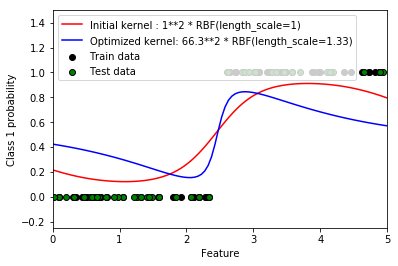

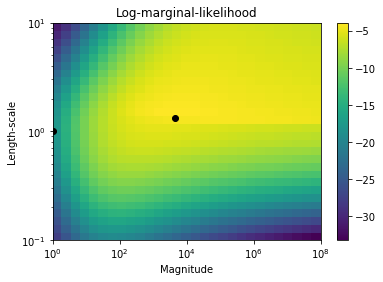

In [8]:
from sklearn.metrics.classification import accuracy_score,log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Generate data
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0,5,100)[:,np.newaxis]
y = np.array(X[:,0] > 2.5,dtype=int)

gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                  optimizer=None)
gp_fix.fit(X[:train_size],y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size],y[:train_size])

print('Log Marginal Likelihood (initial): %.3f'%gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print('Log Marginal Likelihood (optimized): %.3f'%gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))
print('Accuracy : %.3f (initial) %.3f(optimized)'%
     (accuracy_score(y[:train_size],gp_fix.predict(X[:train_size])),
     accuracy_score(y[:train_size],gp_opt.predict(X[:train_size]))))
print('Log-loss: %.3f (initial) %.3f(optimized)'%
     (log_loss(y[:train_size],gp_fix.predict_proba(X[:train_size])[:,1]),
     log_loss(y[:train_size],gp_opt.predict_proba(X[:train_size])[:,1])))

# plot posteriors
plt.figure(0)
plt.scatter(X[:train_size,0],y[:train_size],c='k',label='Train data',
           edgecolor=(0,0,0))
plt.scatter(X[train_size:,0],y[train_size:],c='g',label='Test data',
           edgecolor=(0,0,0))
X_ = np.linspace(0,5,100)
plt.plot(X_,gp_fix.predict_proba(X_[:,np.newaxis])[:,1],'r',label='Initial kernel : %s'%gp_fix.kernel_)
plt.plot(X_,gp_opt.predict_proba(X_[:,np.newaxis])[:,1],'b',label='Optimized kernel: %s'%gp_opt.kernel_)

plt.xlabel('Feature')
plt.ylabel('Class 1 probability')
plt.xlim(0,5)
plt.ylim(-0.25,1.5)
plt.legend(loc='best')

# plot LML landscape
plt.figure(1)
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

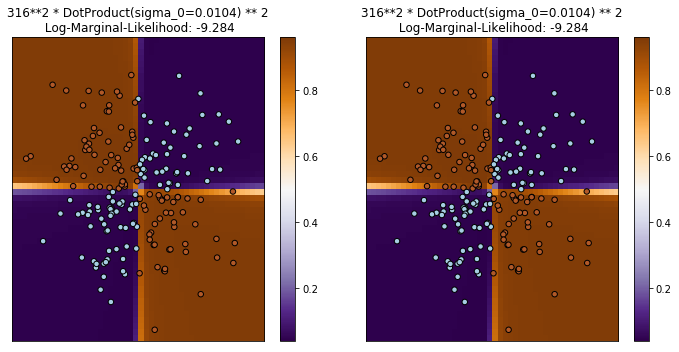

In [16]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF ,DotProduct

xx,yy = np.meshgrid(np.linspace(-3,3,50),np.linspace(-3,3,50))
rng = np.random.RandomState(0)
X = rng.randn(200,2)
Y  = np.logical_xor(X[:,0]>0,X[:,1]>0)

# fit the model
plt.figure(figsize=(10,5))
kernels = [1.0 * RBF(length_scale=1.),1.0 * DotProduct(sigma_0=1.0)**2]
for i,kernels in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel,warm_start=True).fit(X,Y)
    #Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1,2,i+1)
    image = plt.imshow(Z,interpolation='nearest',
                       extent=(xx.min(),xx.max(),yy.min(),yy.max()),
                       aspect='auto',origin='lower',cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx,yy,Z,levels=[0],lw=2,linetypes='--')
    plt.scatter(X[:,0],X[:,1],s=30,c=Y,cmap=plt.cm.Paired,edgecolors=(0,0,0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3,3,-3,3])
    plt.colorbar(image)
    plt.title('%s\n Log-Marginal-Likelihood: %.3f'
             %(clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),fontsize=12)
plt.tight_layout()
plt.show()

                          



                          
                          

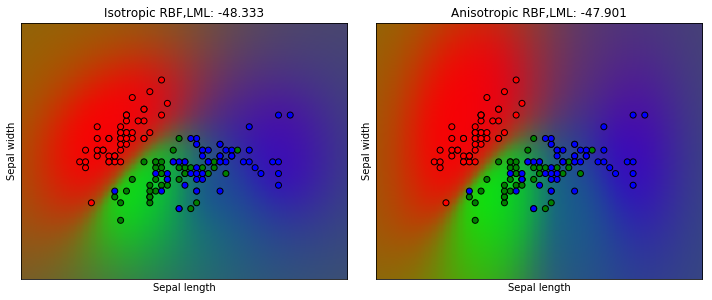

In [18]:
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]
y = np.array(iris.target,dtype=int)

h = 0.02

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X,y)
kernel = 1.0 * RBF([1.0,1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X,y)

# create a mesh to plot in 
x_min,x_max = X[:,0].min() -1 ,X[:,0].max() + 1
y_min,y_max = X[:,1].min() -1 ,X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

titles = ['Isotropic RBF','Anisotropic RBF']
plt.figure(figsize=(10,5))
for i,clf in enumerate((gpc_rbf_isotropic,gpc_rbf_anisotropic)):
    plt.subplot(1,2,i+1)
    
    Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape((xx.shape[0],xx.shape[1],3))
    plt.imshow(Z,extent=(x_min,x_max,y_min,y_max),origin='lower')
    
    plt.scatter(X[:,0],X[:,1],c=np.array(['r','g','b'])[y],edgecolors=(0,0,0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('%s,LML: %.3f'%
             (titles[i],clf.log_marginal_likelihood(clf.kernel_.theta)))
plt.tight_layout()
plt.show()

In [19]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
for hyperparameter in kernel.hyperparameters: print(hyperparameter)


Hyperparameter(name='k1__k1__constant_value', value_type='numeric', bounds=array([[  0.,  10.]]), n_elements=1, fixed=False)
Hyperparameter(name='k1__k2__length_scale', value_type='numeric', bounds=array([[  0.,  10.]]), n_elements=1, fixed=False)
Hyperparameter(name='k2__length_scale', value_type='numeric', bounds=array([[  0.,  10.]]), n_elements=1, fixed=False)


In [20]:

params = kernel.get_params()
for key in sorted(params): print("%s : %s" % (key, params[key]))


k1 : 1**2 * RBF(length_scale=0.5)
k1__k1 : 1**2
k1__k1__constant_value : 1.0
k1__k1__constant_value_bounds : (0.0, 10.0)
k1__k2 : RBF(length_scale=0.5)
k1__k2__length_scale : 0.5
k1__k2__length_scale_bounds : (0.0, 10.0)
k2 : RBF(length_scale=2)
k2__length_scale : 2.0
k2__length_scale_bounds : (0.0, 10.0)


In [21]:
print(kernel.theta) 

[ 0.         -0.69314718  0.69314718]


In [22]:
print(kernel.bounds)

[[       -inf  2.30258509]
 [       -inf  2.30258509]
 [       -inf  2.30258509]]


E:\anaconda\anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:288: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


E:\anaconda\anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:369: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
E:\anaconda\anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:288: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
E:\anaconda\anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


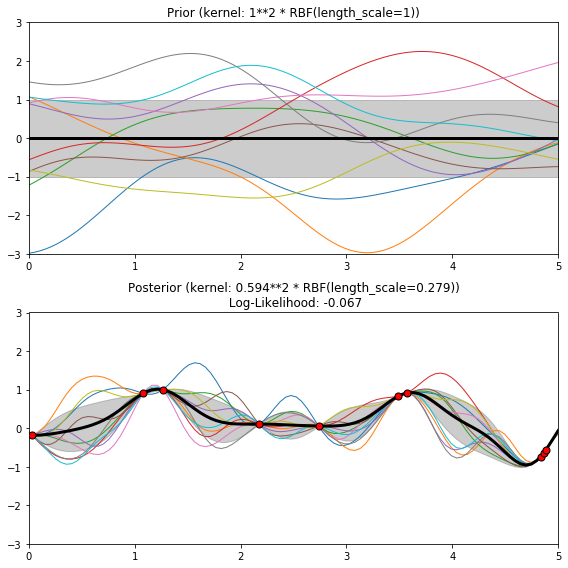

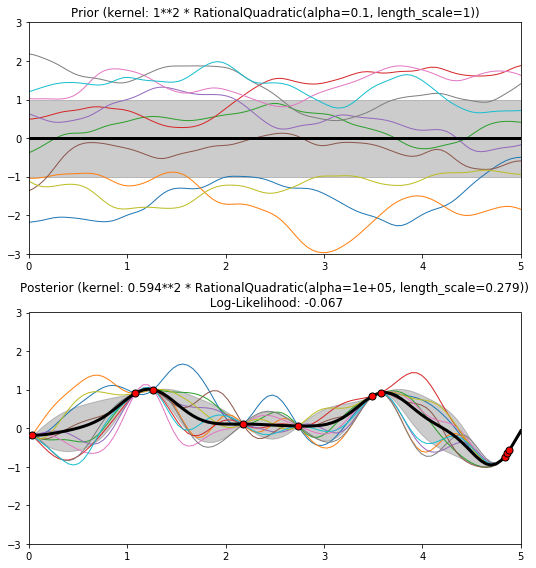

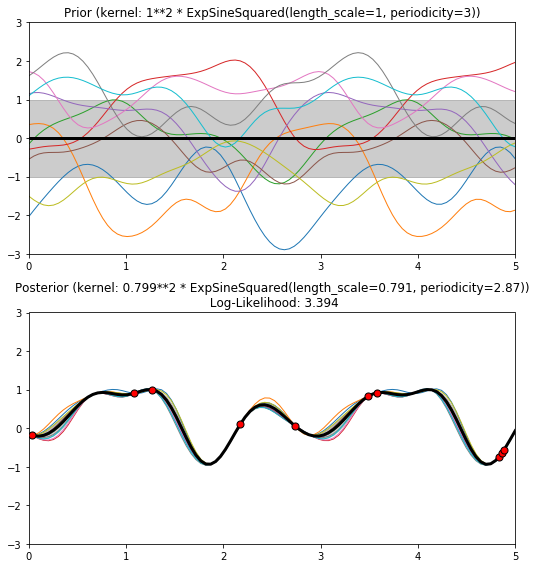

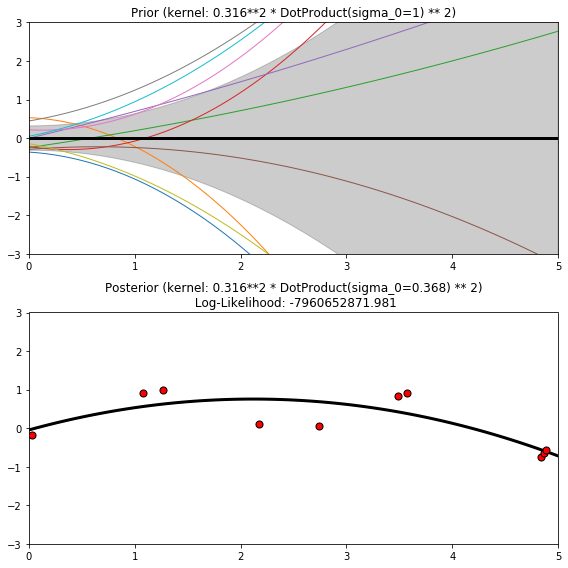

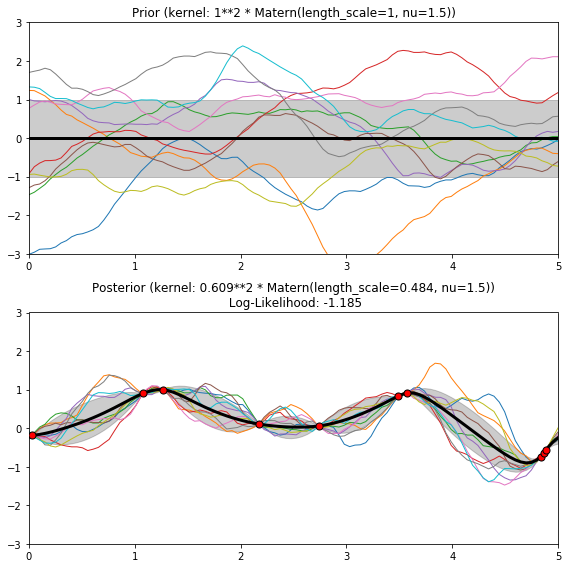

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF,Matern,RationalQuadratic,
                                             ExpSineSquared,DotProduct,ConstantKernel)

kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]


for fig_index,kernel in enumerate(kernels):
    gp = GaussianProcessRegressor(kernel=kernel)
    plt.figure(fig_index,figsize=(8,8))
    plt.subplot(2,1,1)
    X_ = np.linspace(0,5,100)
    y_mean,y_std = gp.predict(X_[:,np.newaxis],return_std=True)
    plt.plot(X_,y_mean,'k',lw=3,zorder=9)
    plt.fill_between(X_,y_mean-y_std,y_mean+y_std,alpha=0.2,color='k')
    y_samples = gp.sample_y(X_[:,np.newaxis],10)
    plt.plot(X_,y_samples,lw=1)
    plt.xlim(0,5)
    plt.ylim(-3,3)
    plt.title('Prior (kernel: %s)'%kernel,fontsize=12)
    
    rng = np.random.RandomState(4)
    X = rng.uniform(0,5,10)[:,np.newaxis]
    y = np.sin((X[:,0]-2.5)**2)
    gp.fit(X,y)
    
    plt.subplot(2,1,2)
    X_ = np.linspace(0,5,100)
    y_mean,y_std = gp.predict(X_[:,np.newaxis],return_std=True)
    plt.plot(X_,y_mean,'k',lw=3,zorder=9)
    plt.fill_between(X_,y_mean-y_std,y_mean+y_std,alpha=0.2,color='k')
    y_samples = gp.sample_y(X_[:,np.newaxis],10)
    plt.plot(X_,y_samples,lw=1)
    plt.scatter(X[:,0],y,c='r',s=50,zorder=10,edgecolor=(0,0,0))
    plt.xlim(0,5)
    plt.ylim(-3,3)
    plt.title('Posterior (kernel: %s)\n Log-Likelihood: %.3f'
             %(gp.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)),fontsize=12)
    plt.tight_layout()
    
plt.show()
    

In [26]:
from sklearn import gaussian_process
def f(x):
    return x*np.sin(x)
X = np.atleast_2d([1.,3,5,6,7,8]).T
y = f(X).ravel()
x = np.atleast_2d(np.linspace(0,10,1000)).T
gp = gaussian_process.GaussianProcess(theta0=1e-2,thetaL=1e-4,thetaU=1e-1)
gp.fit(X,y)

E:\anaconda\anaconda\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
E:\anaconda\anaconda\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x00000000090BEEA0>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x0000000005C75318>,
        regr=<function constant at 0x00000000090BEBF8>,
        storage_mode='full', theta0=array([[ 0.01]]),
        thetaL=array([[ 0.0001]]), thetaU=array([[ 0.1]]), verbose=False)

In [27]:
y_pred,sigma2_pred = gp.predict(x,eval_MSE=True)

In [28]:
y_pred

array([ -4.85974825e+00,  -4.79062616e+00,  -4.72164164e+00,
        -4.65279829e+00,  -4.58409970e+00,  -4.51554945e+00,
        -4.44715112e+00,  -4.37890826e+00,  -4.31082443e+00,
        -4.24290316e+00,  -4.17514798e+00,  -4.10756240e+00,
        -4.04014992e+00,  -3.97291404e+00,  -3.90585821e+00,
        -3.83898592e+00,  -3.77230061e+00,  -3.70580571e+00,
        -3.63950465e+00,  -3.57340083e+00,  -3.50749766e+00,
        -3.44179852e+00,  -3.37630676e+00,  -3.31102575e+00,
        -3.24595882e+00,  -3.18110930e+00,  -3.11648049e+00,
        -3.05207568e+00,  -2.98789815e+00,  -2.92395117e+00,
        -2.86023797e+00,  -2.79676179e+00,  -2.73352584e+00,
        -2.67053331e+00,  -2.60778739e+00,  -2.54529124e+00,
        -2.48304800e+00,  -2.42106080e+00,  -2.35933276e+00,
        -2.29786696e+00,  -2.23666649e+00,  -2.17573439e+00,
        -2.11507371e+00,  -2.05468747e+00,  -1.99457867e+00,
        -1.93475030e+00,  -1.87520532e+00,  -1.81594667e+00,
        -1.75697728e+00,

In [29]:
sigma2_pred

array([  4.33238499e+00,   4.17638003e+00,   4.02497321e+00,
         3.87805596e+00,   3.73552171e+00,   3.59726587e+00,
         3.46318576e+00,   3.33318062e+00,   3.20715160e+00,
         3.08500168e+00,   2.96663567e+00,   2.85196024e+00,
         2.74088378e+00,   2.63331649e+00,   2.52917028e+00,
         2.42835880e+00,   2.33079734e+00,   2.23640291e+00,
         2.14509412e+00,   2.05679121e+00,   1.97141602e+00,
         1.88889196e+00,   1.80914398e+00,   1.73209855e+00,
         1.65768365e+00,   1.58582876e+00,   1.51646478e+00,
         1.44952408e+00,   1.38494041e+00,   1.32264895e+00,
         1.26258623e+00,   1.20469013e+00,   1.14889987e+00,
         1.09515596e+00,   1.04340023e+00,   9.93575750e-01,
         9.45626844e-01,   8.99499069e-01,   8.55139186e-01,
         8.12495148e-01,   7.71516073e-01,   7.32152232e-01,
         6.94355026e-01,   6.58076967e-01,   6.23271662e-01,
         5.89893792e-01,   5.57899097e-01,   5.27244353e-01,
         4.97887361e-01,

Cross Process

Automatically created module for IPython interactive environment
Corr(X)
[[ 1.    0.5   0.05  0.01]
 [ 0.5   1.    0.01 -0.02]
 [ 0.05  0.01  1.    0.49]
 [ 0.01 -0.02  0.49  1.  ]]
Corr(Y)
[[ 1.    0.48  0.   -0.03]
 [ 0.48  1.   -0.02  0.04]
 [ 0.   -0.02  1.    0.5 ]
 [-0.03  0.04  0.5   1.  ]]


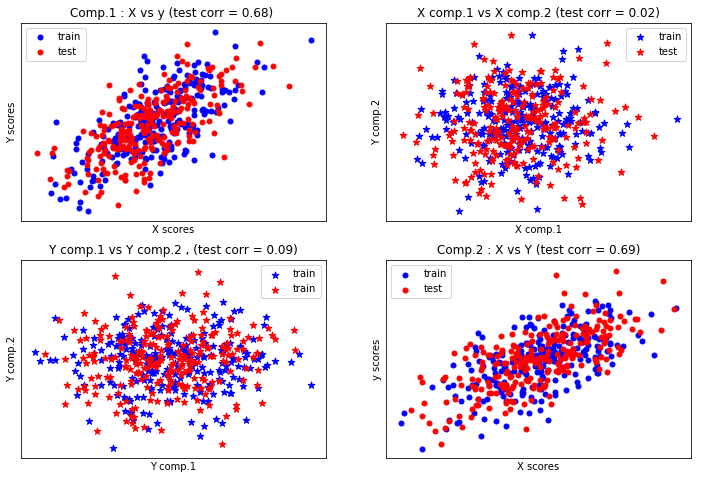

True B (such that: Y = XB +Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 0.  0.  0.]
 [ 0.  0. -0.]
 [-0.  0. -0.]
 [-0.  0.  0.]
 [-0. -0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]
 [-0. -0.  0.]]
Estimated betas
[[ 1.]
 [ 2.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [-0.]
 [ 0.]]


In [6]:
print(__doc__)

from sklearn.cross_decomposition import PLSCanonical, PLSRegression,CCA

# Dataset based latent variables model
n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1,l1,l2,l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n,4))
Y = latents + np.random.normal(size=4 * n).reshape((n,4))

X_train = X[:n//2]
Y_train = Y[:n//2]
X_test = X[n//2:]
Y_test = Y[n//2:]

print('Corr(X)')
print(np.round(np.corrcoef(X.T),2))
print('Corr(Y)')
print(np.round(np.corrcoef(Y.T),2))

# Canonical (symmetric) PLS

# Transform data
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train,Y_train)
X_train_r,Y_train_r = plsca.transform(X_train,Y_train)
X_test_r ,Y_test_r = plsca.transform(X_test,Y_test)

# Scatter plot of scores
#~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(X_train_r[:,0],Y_train_r[:,0],label='train',marker='o',c='b',s=25)
plt.scatter(X_test_r[:,0],Y_test_r[:,0],label='test',marker='o',c='r',s=24)
plt.xlabel('X scores')
plt.ylabel('Y scores')
plt.title('Comp.1 : X vs y (test corr = %.2f) '%
         np.corrcoef(X_test_r[:,0],Y_test_r[:,0])[0,1])
plt.xticks(())
plt.yticks(())
plt.legend(loc='best')

plt.subplot(224)
plt.scatter(X_train_r[:,1],Y_train_r[:,1],label='train',marker='o',c='b',s=25)
plt.scatter(X_test_r[:,1],Y_test_r[:,1],label='test',marker='o',c='r',s=25)
plt.xlabel('X scores')
plt.ylabel('y scores')
plt.title('Comp.2 : X vs Y (test corr = %.2f)'%
         np.corrcoef(X_test_r[:,1],Y_test_r[:,1])[0,1])
plt.xticks(())
plt.yticks(())
plt.legend(loc='best')

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:,0],X_train_r[:,1],label='train',marker='*',c='b',s=50)
plt.scatter(X_test_r[:,0],X_test_r[:,1],label='test',marker='*',c='r',s=50)
plt.xlabel('X comp.1')
plt.ylabel('Y comp.2')
plt.title('X comp.1 vs X comp.2 (test corr = %.2f)'%
         np.corrcoef(X_test_r[:,0],X_test_r[:,1])[0,1])
plt.legend(loc='best')
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:,0],Y_train_r[:,1],label='train',marker='*',c='b',s=50)
plt.scatter(Y_test_r[:,0],Y_test_r[:,1],label='train',marker='*',c='r',s=50)
plt.xlabel('Y comp.1')
plt.ylabel('Y comp.2')
plt.title('Y comp.1 vs Y comp.2 , (test corr = %.2f)'%
         np.corrcoef(Y_test_r[:,0],Y_test_r[:,1])[0,1])
plt.legend(loc='best')
plt.xticks(())
plt.yticks(())
plt.show()

# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n*p).reshape((n,p))
B = np.array([[1,2]+ [0]*(p-2)]*q).T
# each Yj = 1*X1 + 2*X2 +noize
Y = np.dot(X,B) + np.random.normal(size=n*q).reshape((n,q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X,Y)
print('True B (such that: Y = XB +Err)')
print(B)

# compare pls2.coef_ with B
print('Estimated B')
print(np.round(pls2.coef_,1))
pls2.predict(X)

# pls2 regression ,with univariate response, a.k.a. PLS1
n = 1000
p = 10
X = np.random.normal(size=n*p).reshape((n,p))
y = X[:,0] + 2 * X[:,1] + np.random.normal(size=n *1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X,y)
print('Estimated betas')
print(np.round(pls1.coef_,1))
# CCA 
cca = CCA(n_components=2)
cca.fit(X_train,Y_train)
X_train_r ,Y_train_r = cca.transform(X_train,Y_train)
X_test_r,Y_test_r = cca.transform(X_test,Y_test)

Navie Bayes


In [4]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()
gnb = GaussianNB()
y_pred = gnb.fit(iris.data,iris.target).predict(iris.data)
print('Number of mislabelaed points out of a total %d points : %d'
     %(iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabelaed points out of a total 150 points : 6


In [7]:
from sklearn.naive_bayes import MultinomialNB
X = np.random.randint(5,size=(6,100))
y = np.array([1,2,3,4,5,6])

clf = MultinomialNB()
clf.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
print(clf.predict(X[2:3]))

[3]


In [9]:
from sklearn.naive_bayes import BernoulliNB
X = np.random.randint(2,size=(6,100))
Y = np.array([1,2,3,4,5,6])
clf = BernoulliNB()
clf.fit(X,Y)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [10]:
print(clf.predict(X[2:3]))

[3]


In [11]:
X

array([[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0,

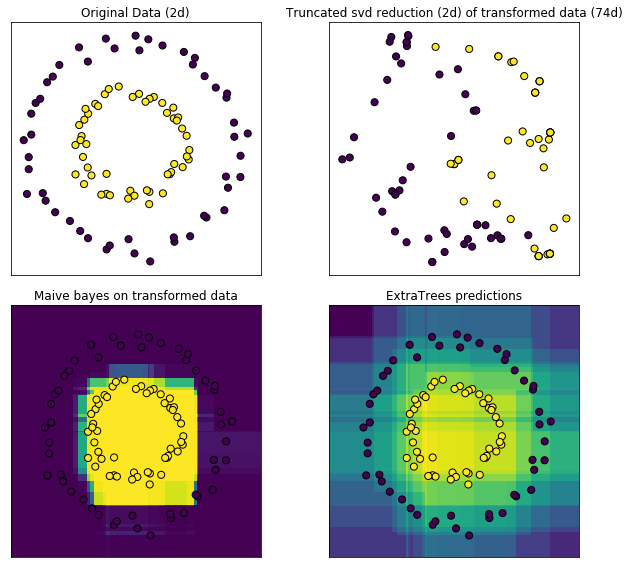

In [15]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding,ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

# make a synthetic datasets
X,y = make_circles(factor=0.5,random_state=0,noise=0.05)

# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=10,random_state=0,max_depth=3)
X_transformed = hasher.fit_transform(X)

# visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# learn a naive bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed,y)

# learn an ExtraTreesclassifier for comparison
trees = ExtraTreesClassifier(max_depth=3,n_estimators=10,random_state=0)
trees.fit(X,y)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9,8))

ax = plt.subplot(221)
ax.scatter(X[:,0],X[:,1],c=y,s=50,edgecolor='k')
ax.set_title('Original Data (2d)')
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:,0],X_reduced[:,1],c=y,s=50,edgecolor='k')
ax.set_title('Truncated svd reduction (2d) of transformed data (%dd)'%
            X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

# plot the decision in original space.
h = .01
x_min,x_max = X[:,0].min() - .5 ,X[:,0].max() + .5
y_min,y_max = X[:,1].min() - .5 ,X[:,1].max() + .5
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(),yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:,1]

ax = plt.subplot(223)
ax.set_title('Maive bayes on transformed data')
ax.pcolormesh(xx,yy,y_grid_pred.reshape(xx.shape))
ax.scatter(X[:,0],X[:,1],c=y,s=50,edgecolor='k')
ax.set_ylim(-1.4,1.4)
ax.set_xlim(-1.4,1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]

ax = plt.subplot(224)
ax.set_title('ExtraTrees predictions')
ax.pcolormesh(xx,yy,y_grid_pred.reshape(xx.shape))
ax.scatter(X[:,0],X[:,1],c=y,s=50,edgecolor='k')
ax.set_ylim(-1.4,1.4)
ax.set_xlim(-1.4,1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()

Decision trees

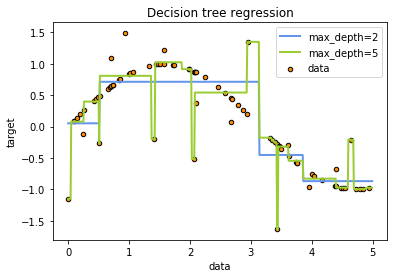

In [17]:
from sklearn.tree import DecisionTreeRegressor

# create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] +=3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

# predict
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# plot the results
plt.figure()
plt.scatter(X,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(X_test,y_1,color='cornflowerblue',label='max_depth=2',lw=2)
plt.plot(X_test,y_2,color='yellowgreen',label='max_depth=5',lw=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision tree regression')
plt.legend()
plt.show()

In [3]:
from sklearn import tree
X = [[0,0],[1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [4]:
clf.predict([[2.,2.]])


array([1])

In [5]:
clf.predict_proba([[2.,2.]])

array([[ 0.,  1.]])

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

In [2]:
import graphviz

In [7]:
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)  
graph.render('iris')

RuntimeError: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' path

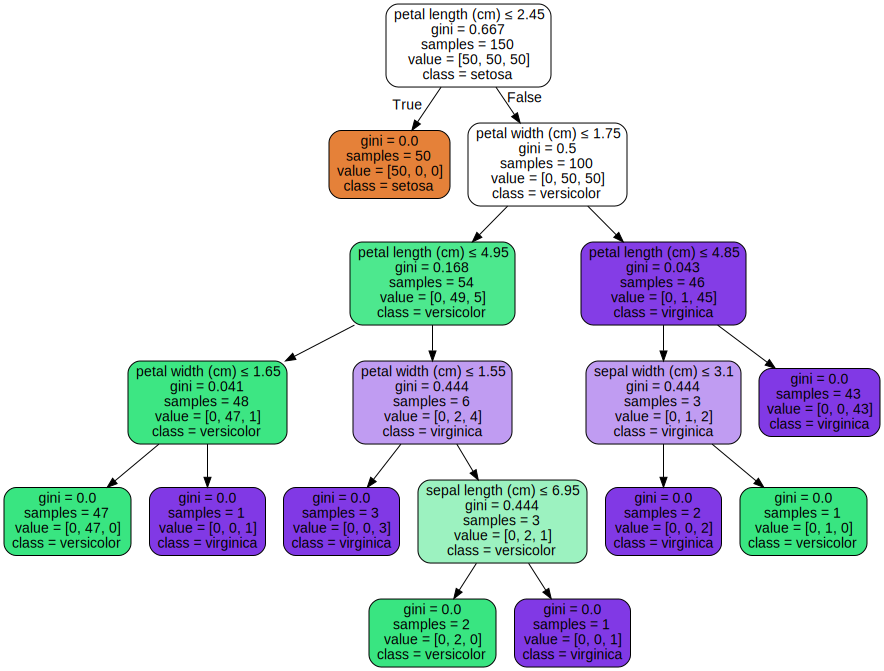

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [26]:
clf.predict(iris.data[:1,:])


array([0])

In [27]:
clf.predict_proba(iris.data[:1,:])


array([[ 1.,  0.,  0.]])

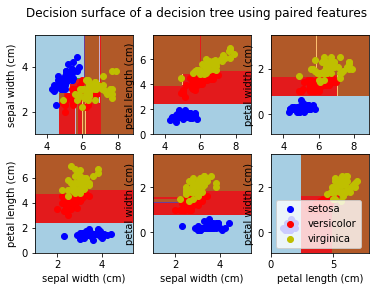

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# parameters
n_classes = 3
plot_colors = 'bry'
plot_step = 0.02

# load data
iris = load_iris()

for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    
    # train
    clf = DecisionTreeClassifier().fit(X,y)
    
    #  plot the decision boundary
    plt.subplot(2,3,pairidx + 1)
    
    x_min,x_max = X[:,0].min() -1 ,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1 ,X[:,1].max() +1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')
    
    # plot the training points
    for i,color in zip(range(n_classes),plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
                   cmap=plt.cm.Paired)
    plt.axis('tight')
    
plt.suptitle('Decision surface of a decision tree using paired features')
plt.legend()
plt.show()
    
    

In [32]:
from sklearn import tree
X = [[0,0],[2,2]]
y = [0.5,2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([ 0.5])

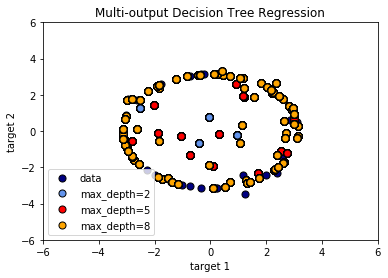

In [34]:
from sklearn.tree import DecisionTreeRegressor
# create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100,1) - 100 ,axis=0)
y = np.array([np.pi * np.sin(X).ravel(),np.pi * np.cos(X).ravel()]).T
y[::5,:] += ( .5 -rng.rand(20,2))

# fit regressor model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X,y)
regr_2.fit(X,y)
regr_3.fit(X,y)

#predict
X_test = np.arange(-100.,100,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# plot the results
plt.figure()
s = 50
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

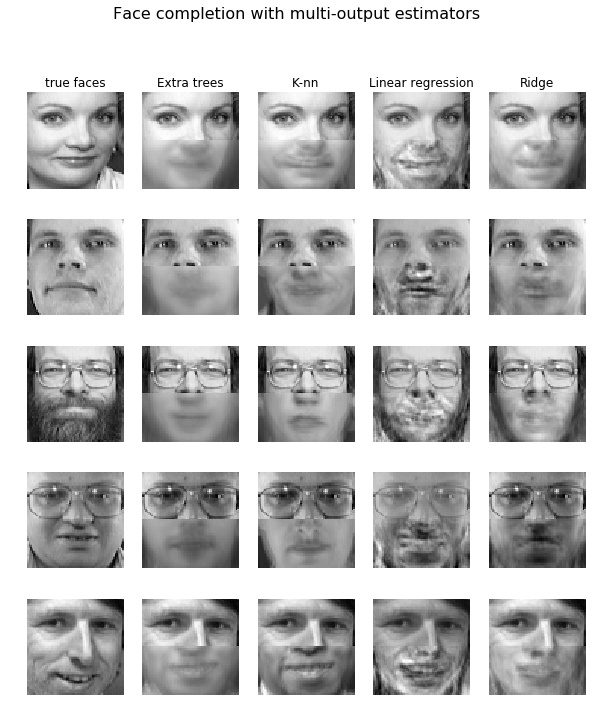

In [39]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

#load the data
data = fetch_olivetti_faces(data_home='E:/python_work/handson_ml/datasets/')
targets = data.target

data = data.images.reshape((len(data.images),-1))
train = data[targets < 30]
test = data[targets >= 30]

# test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0],size=(n_faces,))
test = test[face_ids,:]

n_pixels = data.shape[1]
X_train = train[:,:(n_pixels+1)//2]
y_train = train[:,n_pixels//2:]
X_test = test[:,:(n_pixels +1)//2]
y_test = test[:,n_pixels//2:]

# fit estimators 
estimators = {
    'Extra trees':ExtraTreesRegressor(n_estimators=100,max_features=32,
                                     random_state=0),
    'K-nn':KNeighborsRegressor(),
    'Linear regression':LinearRegression(),
    'Ridge':RidgeCV()
}

y_test_predict = dict()
for name,estimator in estimators.items():
    estimator.fit(X_train,y_train)
    y_test_predict[name] = estimator.predict(X_test)
    
# plot the completed faces
image_shape = (64,64)

n_cols = 1 + len(estimators)
plt.figure(figsize=(2. * n_cols,2.25* n_faces))
plt.suptitle('Face completion with multi-output estimators',size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(estimators)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()




Ensemble methods

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,max_features=0.5)

Tree:0.0255 (error) = 0.0003 (bias^2) 0.0152 (var) 0.0098 (noise)
Bagging(Tree):0.0196 (error) = 0.0004 (bias^2) 0.0092 (var) 0.0098 (noise)


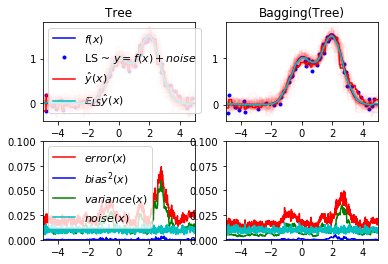

In [43]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# setting
n_repeat = 50
n_train = 50
n_test = 1000
noise = .1
np.random.seed(0)

estimators = [('Tree',DecisionTreeRegressor()),
              ('Bagging(Tree)',BaggingRegressor(DecisionTreeRegressor()))]
n_estimators = len(estimators)

# generate data
def f(x):
    x = x.ravel()
    return np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

def generate(n_samples,noise,n_repeat=1):
    X = np.random.rand(n_samples) * 10 -5
    X = np.sort(X)
    
    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0,noise,n_samples)
    else:
        y = np.zeros((n_samples,n_repeat))
        
        for i in range(n_repeat):
            y[:,i] = f(X) + np.random.normal(0.0,noise,n_samples)
            
    X = X.reshape((n_samples,1))
    
    return X,y

X_train = []
y_train = []

for i in range(n_repeat):
    X,y = generate(n_samples=n_train,noise=noise)
    X_train.append(X)
    y_train.append(y)
    
X_test,y_test = generate(n_samples=n_test,noise=noise,n_repeat=n_repeat)

#loop over estimators to compare
for n ,(name,estimator) in enumerate(estimators):
    # compare predictions
    y_predict = np.zeros((n_test,n_repeat))
    
    for i in range(n_repeat):
        estimator.fit(X_train[i],y_train[i])
        y_predict[:,i] = estimator.predict(X_test)
        
    y_error = np.zeros(n_test)
    
    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:,j] - y_predict[:,i]) **2
        
    y_error /= (n_repeat * n_repeat)
    
    y_noise = np.var(y_test,axis=1)
    y_bias  = (f(X_test)-np.mean(y_predict,axis=1)) ** 2
    y_var = np.var(y_predict,axis=1)
    
    print('{0}:{1:.4f} (error) = {2:.4f} (bias^2) {3:.4f} (var) {4:.4f} (noise)'.format(name,
                                                                                       np.mean(y_error),
                                                                                       np.mean(y_bias),
                                                                                       np.mean(y_var),
                                                                                       np.mean(y_noise)))
    #plot figures
    plt.subplot(2,n_estimators,n+1)
    plt.plot(X_test,f(X_test),'b',label='$f(x)$')
    plt.plot(X_train[0],y_train[0],'.b',label='LS ~ $y = f(x)+noise$')
    
    for i in range(n_repeat):
        if i ==0:
            plt.plot(X_test,y_predict[:,i],'r',label='$\^y(x)$')
        else:
            plt.plot(X_test,y_predict[:,i],'r',alpha=0.05)
    
    plt.plot(X_test,np.mean(y_predict,axis=1),'c',label='$\mathbb{E}_{LS} \^y(x)$')
    plt.xlim([-5,5])
    plt.title(name)
    
    if n==0:
        plt.legend(loc='upper left',prop={'size':11})
    
    plt.subplot(2,n_estimators,n_estimators + n +1)
    plt.plot(X_test,y_error,'r',label='$error(x)$')
    plt.plot(X_test,y_bias,'b',label='$bias^2(x)$')
    plt.plot(X_test,y_var,'g',label='$variance(x)$')
    plt.plot(X_test,y_noise,'c',label='$noise(x)$')
    
    plt.xlim([-5,5])
    plt.ylim([0,0.1])
    
    if n ==0:
        plt.legend(loc='upper left',prop={'size':11})
        
plt.show()

    

In [44]:
from sklearn.ensemble import RandomForestClassifier
X = [[0,0],[1,1]]
y = [0,1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X,y)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X,y = make_blobs(n_samples=10000,n_features=10,centers=100,random_state=0)
clf = DecisionTreeClassifier(max_depth=None,min_samples_split=2,random_state=0)
scores = cross_val_score(clf,X,y)
scores


array([ 0.97852941,  0.98212121,  0.97757576])

In [6]:
scores.mean()

0.97940879382055857

In [7]:
clf = RandomForestClassifier(n_estimators=10,max_depth=None,min_samples_split=2,random_state=0)
scores = cross_val_score(clf,X,y)
scores

array([ 0.99882353,  1.        ,  1.        ])

In [8]:
clf = ExtraTreesClassifier(n_estimators=10,max_depth=None,min_samples_split=2,random_state=0)
scores = cross_val_score(clf,X,y)
scores

array([ 1.        ,  1.        ,  0.99969697])

DecisionTreewith features [0, 1] has a score of 0.926666666667
RandomForestwith 30 estimatorswith features [0, 1] has a score of 0.926666666667
ExtraTreeswith 30 estimatorswith features [0, 1] has a score of 0.926666666667
AdaBoostwith 30 estimatorswith features [0, 1] has a score of 0.84
DecisionTreewith features [0, 2] has a score of 0.993333333333
RandomForestwith 30 estimatorswith features [0, 2] has a score of 0.993333333333
ExtraTreeswith 30 estimatorswith features [0, 2] has a score of 0.993333333333
AdaBoostwith 30 estimatorswith features [0, 2] has a score of 0.993333333333
DecisionTreewith features [2, 3] has a score of 0.993333333333
RandomForestwith 30 estimatorswith features [2, 3] has a score of 0.993333333333
ExtraTreeswith 30 estimatorswith features [2, 3] has a score of 0.993333333333
AdaBoostwith 30 estimatorswith features [2, 3] has a score of 0.993333333333


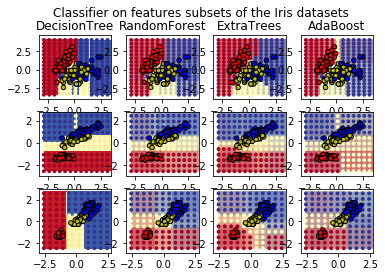

In [15]:
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
random_seed = 13

# load_data
iris = load_iris()
plot_idx = 1
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)
]

for pair in ([0,1],[0,2],[2,3]):
    for model in models:
        # only take the two corresponding features
        X = iris.data[:,pair]
        y = iris.target
        
        # shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        # standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        # train
        clf = clone(model)
        clf = model.fit(X,y)
        
        scores = clf.score(X,y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]
        
        model_details = model_title
        if hasattr(model,'estimators_'):
            model_details +='with {} estimators'.format(len(model.estimators_))
        print(model_details + ' with features',pair,'has a score of',scores)
        
        plt.subplot(3,4,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title)
        
        x_min,x_max = X[:,0].min() -1,X[:,0].max() +1
        y_min,y_max = X[:,1].min() -1,X[:,1].max() +1
        xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                           np.arange(y_min,y_max,plot_step))
        if isinstance(model,DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx,yy,Z,cmap=cmap)
        else:
            estimator_alpha = 1.0/len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(),yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx,yy,Z,alpha=estimator_alpha,cmap=cmap)
        xx_coarser,yy_coarser = np.meshgrid(
            np.arange(x_min,x_max,plot_step_coarser),
            np.arange(y_min,y_max,plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser,yy_coarser,s=15,c=Z_points_coarser,cmap=cmap,edgecolors='none')
        plt.scatter(X[:,0],X[:,1],c=y,cmap=ListedColormap(['r','y','b']),edgecolor='k',s=20)
        plot_idx +=1
plt.suptitle('Classifier on features subsets of the Iris datasets')
plt.axis('tight')

plt.show()

                

Fitting ExtraTreesClassifier on faces dat with 1 cores...
done in 4.953s


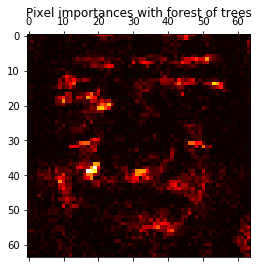

In [17]:
from time import time
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier
n_jobs =1
#load the face datasets
data = fetch_olivetti_faces(data_home='E:/python_work/handson_ml/datasets/')
X = data.images.reshape((len(data.images),-1))
y = data.target

mask = y < 5
X = X[mask]
y = y[mask]

# build a forest and compute the pixel importances
print('Fitting ExtraTreesClassifier on faces dat with %d cores...'%n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,max_features=128,random_state=0)
forest.fit(X,y)

print('done in %.3fs'%(time()-t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

#plot pixel importance
plt.matshow(importances,cmap=plt.cm.hot)
plt.title('Pixel importances with forest of trees')
plt.show()


Feature ranking
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


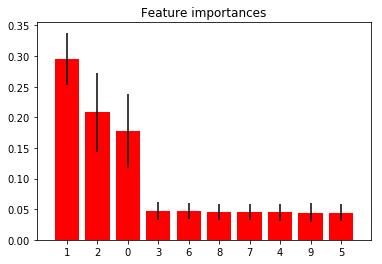

In [23]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# build a classification task using 3 informative features
X,y = make_classification(n_samples=1000,
                         n_features=10,
                         n_informative=3,
                         n_redundant=0,
                          n_repeated=0,
                         n_classes=2,
                         random_state=0,
                         shuffle=False)
# build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print('Feature ranking')

for f in range(X.shape[1]):
    print('%d. feature %s (%f)'%(f+1,indices[f],importances[indices[f]]))
    
plt.figure()
plt.title('Feature importances')
plt.bar(range(X.shape[1]),importances[indices],color='r',yerr=std[indices],align='center')
plt.xticks(range(X.shape[1]),indices)
plt.xlim([-1,X.shape[1]])
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf,iris.data,iris.target)
scores

array([ 0.98039216,  0.94117647,  0.95833333])

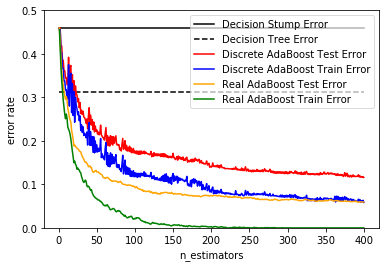

In [33]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier

n_estimators = 400
learning_rate = 1.

X,y = datasets.make_hastie_10_2(n_samples=12000,random_state=1)

X_test,y_test = X[2000:],y[2000:]
X_train,y_train = X[:2000],y[:2000]

dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(X_train,y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test,y_test)

dt = DecisionTreeClassifier(max_depth=9,min_samples_leaf=1)
dt.fit(X_train,y_train)
dt_err = 1. - dt.score(X_test,y_test)

ada_discrete = AdaBoostClassifier(base_estimator=dt_stump,
                                 learning_rate=learning_rate,
                                 n_estimators=n_estimators,
                                 algorithm='SAMME')
ada_discrete.fit(X_train,y_train)

ada_real = AdaBoostClassifier(base_estimator=dt_stump,
                             learning_rate=learning_rate,
                             n_estimators=n_estimators,
                             algorithm='SAMME.R')
ada_real.fit(X_train,y_train)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err] *2,'k-',label='Decision Stump Error')
ax.plot([1,n_estimators],[dt_err] *2 ,'k--',label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred,y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred,y_train)
    
ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

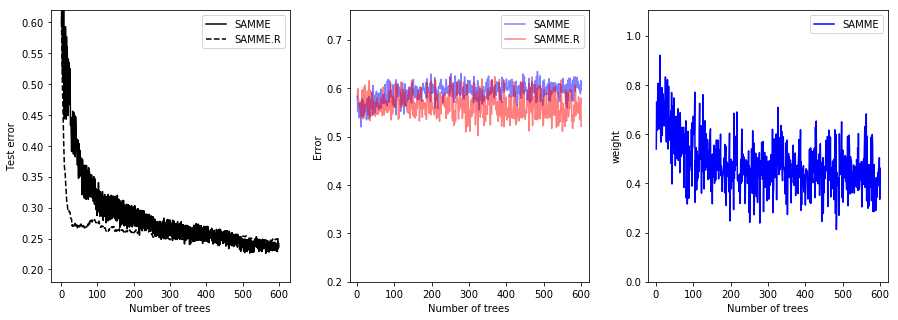

In [43]:
from sklearn.externals.six.moves import zip
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X,y = make_gaussian_quantiles(n_samples=13000,n_features=10,n_classes=3,random_state=1)

n_split = 3000

X_train,X_test = X[:n_split],X[n_split:]
y_train,y_test = y[:n_split],y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm='SAMME')

bdt_real.fit(X_train,y_train)
bdt_discrete.fit(X_train,y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict,discrete_train_predict in zip(
        bdt_real.staged_predict(X_test),bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict,y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict,y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(range(1,n_trees_discrete +1),discrete_test_errors,c='black',label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18,0.62)
plt.ylabel('Test error')
plt.xlabel('Number of trees')

plt.subplot(132)
plt.plot(range(1,n_trees_discrete +1),discrete_estimator_errors,'b',label='SAMME',alpha=.5)
plt.plot(range(1,n_trees_real +1),real_estimator_errors,'r',label='SAMME.R',alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.ylim((.2,max(real_estimator_errors.max(),discrete_estimator_errors.max())*1.2))
plt.xlim(-20,len(bdt_discrete)+20)

plt.subplot(133)
plt.plot(range(1,n_trees_discrete +1),discrete_estimator_weights,'b',label='SAMME')
plt.legend()
plt.ylabel('weight')
plt.xlabel('Number of trees')
plt.ylim((0,discrete_estimator_weights.max()*1.2))
plt.xlim(-20,n_trees_discrete + 20)

plt.subplots_adjust(wspace=0.25)
plt.show()

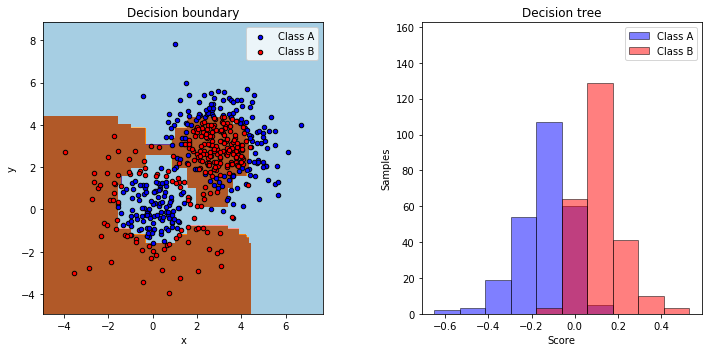

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# construct data
X1,y1 = make_gaussian_quantiles(cov=2.,n_samples=200,n_features=2,
                               n_classes=2,random_state=1)
X2,y2 = make_gaussian_quantiles(mean=(3,3),cov=1.5,n_samples=300,n_features=2,
                               n_classes=2,random_state=1)
X = np.concatenate((X1,X2))
y = np.concatenate((y1,-y2 +1))

# create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                        algorithm='SAMME',n_estimators=200)
bdt.fit(X,y)

plot_colors ='br'
plot_step = 0.02
class_names = 'AB'

plt.figure(figsize=(10,5))

#plot the decision boundary
plt.subplot(121)
x_min,x_max = X[:,0].min() -1 ,X[:,0].max() +1
y_min,y_max = X[:,1].min() -1 ,X[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))

Z = bdt.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
plt.axis('tight')

#plot the training points
for i,n,c in zip(range(2),class_names,plot_colors):
    idx = np.where(y==i)
    plt.scatter(X[idx,0],X[idx,1],c=c,cmap=plt.cm.Paired,s=20,edgecolor='k',label='Class %s'%n)

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision boundary')

# plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(),twoclass_output.max())
plt.subplot(122)
for i ,n,c in zip(range(2),class_names,plot_colors):
    plt.hist(twoclass_output[y==i],bins=10,range=plot_range,facecolor=c,label='Class %s'%n,alpha=.5,edgecolor='k')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2*1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision tree')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()


In [10]:
twoclass_output.shape

(500,)

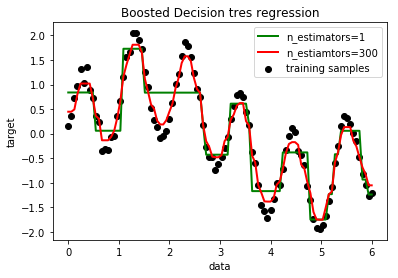

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# create data
rng = np.random.RandomState(1)
X = np.linspace(0,6,100)[:,np.newaxis]
y = np.sin(X).ravel() + np.sin(6 *X).ravel() + rng.normal(0,0.1,X.shape[0])

# fit regression model

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300,random_state=rng)
regr_1.fit(X,y)
regr_2.fit(X,y)

# predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# plot the results
plt.figure()
plt.scatter(X,y,c='k',label='training samples')
plt.plot(X,y_1,c='g',label='n_estimators=1',lw=2)
plt.plot(X,y_2,c='r',label='n_estiamtors=300',lw=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Boosted Decision tres regression')
plt.legend()
plt.show()

In [15]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X,y = make_hastie_10_2(random_state=0)
X_train,X_test = X[:2000],X[2000:]
y_train,y_test = y[:2000],y[2000:]

clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.,
                                max_depth=1,random_state=0).fit(X_train,y_train)
clf.score(X_test,y_test)

0.91300000000000003

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X,y = make_friedman1(n_samples=1200,random_state=0,noise=1.)
X_train,X_test = X[:200],X[200:]
y_train,y_test = y[:200],y[200:]
est = GradientBoostingRegressor(n_estimators=100,learning_rate=.1,
                               max_depth=1,random_state=0,loss='ls').fit(X_train,y_train)
mean_squared_error(y_test,est.predict(X_test))

5.0091548599603213

MSE: 6.5384


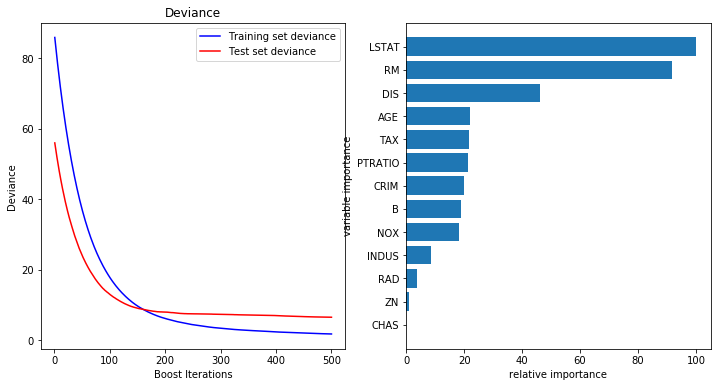

In [20]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

#load data
boston = datasets.load_boston()
X,y = shuffle(boston.data,boston.target,random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train,y_train = X[:offset],y[:offset]
X_test,y_test = X[offset:],y[offset:]

# fit  regression model
params = {'n_estimators':500,'max_depth':4,'min_samples_split':2,'learning_rate':0.01,'loss':'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train,y_train)
mse = mean_squared_error(y_test,clf.predict(X_test))
print('MSE: %.4f'%mse)

#plot training deviance
test_score = np.zeros((params['n_estimators'],),dtype=np.float64)

for i,y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test,y_pred)
    
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) +1 ,clf.train_score_,'b-',
        label='Training set deviance')
plt.plot(np.arange(params['n_estimators']) +1,test_score,'r-',
        label='Test set deviance')
plt.legend(loc='upper right')
plt.xlabel('Boost Iterations')
plt.ylabel('Deviance')

#plot feature importance
feature_importance = clf.feature_importances_
feature_importance = 100. * (feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(122)
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,boston.feature_names[sorted_idx])
plt.xlabel('relative importance')
plt.ylabel('variable importance')
plt.show()

accuracy: 0.6840


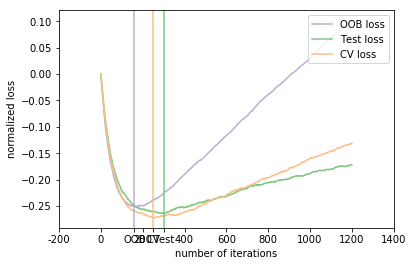

In [24]:
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# generate data
n_samples = 1000
random_state = np.random.RandomState(13)
x1 = random_state.uniform(size=n_samples)
x2 = random_state.uniform(size=n_samples)
x3 = random_state.randint(0,4,size=n_samples)

p = 1/(1.0 + np.exp(-(np.sin(3*x1) - 4 *x2 +x3)))
y = random_state.binomial(1,p,size=n_samples)

x = np.c_[x1,x2,x3]
x = x.astype(np.float32)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.5,random_state=9)

# fit classifier with out-of-bag estimates
params = {'n_estimators':1200,'max_depth':3,'subsample':.5,'learning_rate':0.01,
         'min_samples_leaf':1,'random_state':3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(x_train,y_train)
acc = clf.score(x_test,y_test)
print('accuracy: {:.4f}'.format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) +1

def heldout_score(clf,x_test,y_test):
    score = np.zeros((n_estimators,),dtype=np.float64)
    for i,y_pred in enumerate(clf.staged_decision_function(x_test)):
        score[i] = clf.loss_(y_test,y_pred)
    return score

def cv_estimate(n_splits=3):
    cv = KFold(n_splits=n_splits)
    cv_clf = ensemble.GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators,),dtype=np.float64)
    for train,test in cv.split(x_train,y_train):
        cv_clf.fit(x_train[train],y_train[train])
        val_scores +=heldout_score(cv_clf,x_train[test],y_train[test])
    val_scores /= n_splits
    return val_scores

cv_score = cv_estimate(3)

test_score = heldout_score(clf,x_test,y_test)

cumsum = -np.cumsum(clf.oob_improvement_)


# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()

In [ ]:
_ = est.set_params(n_estimators=200,warm_start=True)
_ = est.fit(X_train, y_train) # fit additional 100 trees to est
mean_squared_error(y_test, est.predict(X_test))    


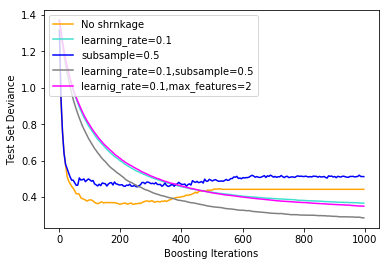

In [6]:
from sklearn import ensemble
from sklearn import datasets

X,y = datasets.make_hastie_10_2(n_samples=12000,random_state=1)
X = X.astype(np.float32)

# map labels from {-1,1} to {0,1}
labels ,y = np.unique(y,return_inverse=True)

X_train,X_test = X[:2000],X[2000:]
y_train,y_test = y[:2000],y[2000:]

original_params = {'n_estimators':1000,'max_leaf_nodes':4,'max_depth':None,
                  'random_state':2,'min_samples_split':5}
plt.figure()

for label,color,setting in [('No shrnkage','orange',
                            {'learning_rate':1.0,'subsample':1.0}),
                           ('learning_rate=0.1','turquoise',
                           {'learning_rate':.1,'subsample':1.0}),
                           ('subsample=0.5','blue',
                           {'learning_rate':1.0,'subsample':0.5}),
                           ('learning_rate=0.1,subsample=0.5','gray',
                           {'learning_rate':.1,'subsample':.5}),
                           ('learnig_rate=0.1,max_features=2','magenta',
                           {'learning_rate':0.1,'max_features':2})]:
    params = dict(original_params)
    params.update(setting)
    
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train,y_train)
    
    test_deviance = np.zeros((params['n_estimators'],),dtype=np.float64)
    
    for i,y_pred in enumerate(clf.staged_decision_function(X_test)):
        test_deviance[i] = clf.loss_(y_test,y_pred)
        
    plt.plot((np.arange(test_deviance.shape[0])+1)[::5],test_deviance[::5], '-',color=color,label=label)
plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()



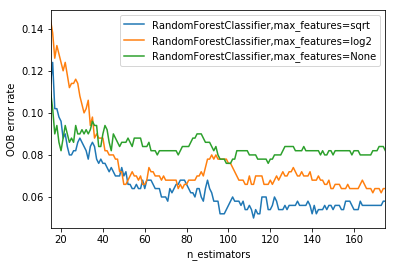

In [8]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

random_state = 123

#generate a binary classification datasets
X,y = make_classification(n_samples=500,n_features=25,n_clusters_per_class=1,
                         n_informative=15,random_state=random_state)
ensemble_clfs = [
    ('RandomForestClassifier,max_features=sqrt',
     RandomForestClassifier(warm_start=True,oob_score=True,
                            max_features='sqrt',random_state=random_state)),
    ('RandomForestClassifier,max_features=log2',
    RandomForestClassifier(warm_start=True,max_features='log2',
                          oob_score=True,random_state=random_state)),
    ('RandomForestClassifier,max_features=None',
    RandomForestClassifier(warm_start=True,max_features=None,
                          oob_score=True,random_state=random_state))
]

error_rate = OrderedDict((label,[]) for label,_ in ensemble_clfs)

min_estimators = 15
max_estimators = 175

for label,clf in ensemble_clfs:
    for i in range(min_estimators,max_estimators +1):
        clf.set_params(n_estimators=i)
        clf.fit(X,y)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i,oob_error))
        
for label,clf_err in error_rate.items():
    xs,ys = zip(*clf_err)
    plt.plot(xs,ys,label=label)
    
plt.xlim(min_estimators,max_estimators)
plt.xlabel('n_estimators')
plt.ylabel('OOB error rate')
plt.legend(loc='upper right')
plt.show()

In [10]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X,y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0).fit(X,y)
clf.feature_importances_

array([ 0.11,  0.1 ,  0.11,  0.1 ,  0.09,  0.11,  0.09,  0.1 ,  0.1 ,  0.09])

Training GBRT...
done.
Convenience plot with "partial_dependence_plots"
Custom 3d plot via "partial_dependence"


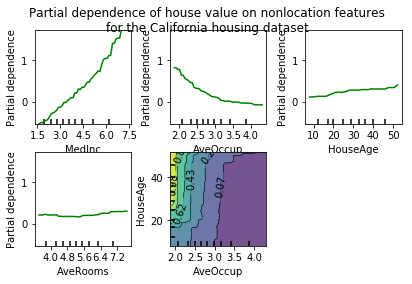

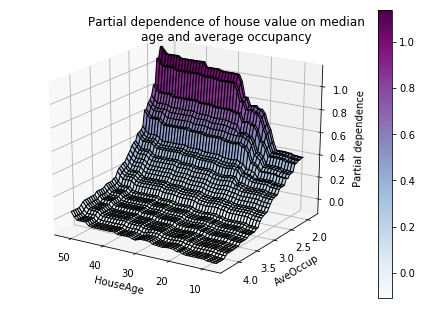

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

def main():
    cal_housing = fetch_california_housing(data_home='E:/python_work/handson_ml/datasets/')
    
    X_train,X_test,y_train,y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=.2,random_state=1)
    names = cal_housing.feature_names
    print('Training GBRT...')
    clf = GradientBoostingRegressor(n_estimators=100,max_depth=4,learning_rate=.1,
                                   loss='huber',random_state=1)
    clf.fit(X_train,y_train)
    print('done.')
    
    print('Convenience plot with "partial_dependence_plots"')
    
    features = [0,5,1,2,(5,1)]
    fig,axs = plot_partial_dependence(clf,X_train,features,feature_names=names,
                                     grid_resolution=50)
    fig.suptitle('Partial dependence of house value on nonlocation features\n' 
                 'for the California housing dataset')
    plt.subplots_adjust(top=0.9)
    
    print('Custom 3d plot via "partial_dependence"')
    fig = plt.figure()
    target_feature = (1,5)
    pdp,axes = partial_dependence(clf,target_feature,X=X_train,grid_resolution=50)
    
    XX,YY = np.meshgrid(axes[0],axes[1])
    Z = pdp[0].reshape(list(map(np.size,axes))).T
    ax = Axes3D(fig)
    surf  =ax.plot_surface(XX,YY,Z,rstride=1,cstride=1,cmap=plt.cm.BuPu,edgecolor='k')
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    
    ax.view_init(elev=22,azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of house value on median\n'
                'age and average occupancy')
    plt.subplots_adjust(top=0.9)
    plt.show()
    
if __name__ == '__main__':
    main()

    



In [14]:
samples = [[0, 0, 2], [1, 0, 0]]
labels = [0, 1]
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0).fit(samples, labels)
kwargs = dict(X=samples, percentiles=(0, 1), grid_resolution=2)
partial_dependence(gb, [0], **kwargs) 

(array([[-4.39701555,  4.39701555]]), [array([ 0.,  1.])])

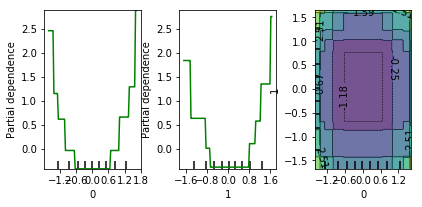

In [15]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X, features) 

In [16]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


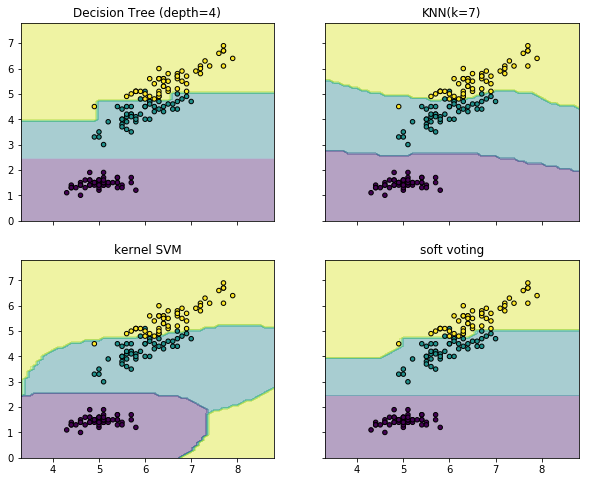

In [18]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X = iris.data[:,[0,2]]
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf',probability=True)
eclf = VotingClassifier(estimators=[('dt',clf1),('knn',clf2),('svc',clf3)],
                       voting='soft',weights=[2,1,2])
clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

x_min,x_max = X[:,0].min() -1,X[:,0].max()+1
y_min,y_max = X[:,1].min() -1,X[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

f,axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(10,8))

for idx,clf,tt in zip(product([0,1],[0,1]),[clf1,clf2,clf3,eclf],
                     ['Decision Tree (depth=4)','KNN(k=7)','kernel SVM','soft voting']):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
    axarr[idx[0],idx[1]].set_title(tt)
    
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

Multiclass and multilabel algorithms


In [3]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[2,3,4],[2],[0,1,3],[0,1,2,3,4],[0,1,2]]
MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [4]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X,y = iris.data,iris.target
OneVsRestClassifier(LinearSVC(random_state=1)).fit(X,y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

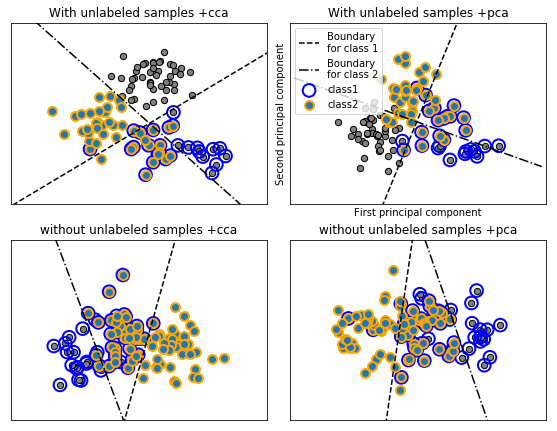

In [11]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

def plot_hyperplane(clf,min_x,max_x,linestyle,label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0]/w[1]
    xx = np.linspace(min_x-5,max_x+5)
    yy = a * xx - (clf.intercept_[0])/w[1]
    plt.plot(xx,yy,linestyle,label=label)
    
def plot_subfigure(X,Y,subplot,title,transform):
    if transform == 'pca':
        X = PCA(n_components=2).fit_transform(X)
    elif transform == 'cca':
        X = CCA(n_components=2).fit(X,Y).transform(X)
    else :
        raise ValueError
        
    min_x,max_x = np.min(X[:,0]),X[:,0].max()
    min_y,max_y = X[:,1].min() ,X[:,1].max()
    
    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X,Y)
    
    plt.subplot(2,2,subplot)
    plt.title(title)
    
    zeros_class = np.where(Y[:,0])
    one_class = np.where(Y[:,1])
    plt.scatter(X[:,0],X[:,1],s=40,c='gray',edgecolors=(0,0,0))
    plt.scatter(X[zeros_class,0],X[zeros_class,1],s=160,edgecolors='b',facecolors='none',lw=2,label='class1')
    plt.scatter(X[one_class,0],X[one_class,1],s=80,edgecolors='orange',
               facecolors=None,lw=2,label='class2')
    
    plot_hyperplane(classif.estimators_[0],min_x,max_x,'k--','Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1],min_x,max_x,'k-.','Boundary\nfor class 2')
    
    plt.xticks(())
    plt.yticks(())
    plt.xlim(min_x - .5* max_x,max_x+ .5 * max_x)
    plt.ylim(min_y - .5* max_y,max_y+ .5 * max_y)
    if subplot ==2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc='upper left')
        
plt.figure(figsize=(8,6))
X,Y = make_multilabel_classification(n_classes=2,n_labels=1,allow_unlabeled=True,
                                    random_state=1)
plot_subfigure(X,Y,1,'With unlabeled samples +cca','cca')
plot_subfigure(X,Y,2,'With unlabeled samples +pca','pca')

X,Y = make_multilabel_classification(n_classes=2,n_labels=1,allow_unlabeled=False,
                                    random_state=1)
plot_subfigure(X,Y,3,'without unlabeled samples +cca','cca')
plot_subfigure(X,Y,4,'without unlabeled samples +pca','pca')

plt.subplots_adjust(.04,.02,.97,.94,.09,.2)
plt.show()
    

In [17]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X,y = iris.data,iris.target
a = OneVsOneClassifier(LinearSVC(random_state=0))
a.fit(X,y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
a.estimators_

(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
      verbose=0))

In [21]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X,y = iris.data,iris.target
clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2,random_state=0)
clf.fit(X,y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X,y = make_regression(n_samples=10,n_targets=3,random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X,y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

In [28]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
X,y1 = make_classification(n_samples=10,n_features=100,n_informative=30,
                           n_classes=3,random_state=1)
y2 = shuffle(y1,random_state=1)
y3 = shuffle(y1,random_state=2)
Y = np.vstack((y1,y2,y3)).T
n_samples,n_features=X.shape
n_outputs = Y.shape[1]
n_classes = 3
forest = RandomForestClassifier(n_estimators=100,random_state=1)
multi_target_forest = MultiOutputClassifier(forest)
multi_target_forest.fit(X,Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

Feature selection

In [29]:
from sklearn.feature_selection import VarianceThreshold
X = [[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
sel = VarianceThreshold(threshold=(.8 * (1 -.8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [30]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
X,y = iris.data,iris.target
X.shape

(150, 4)

In [31]:
X_new = SelectKBest(chi2,k=2).fit_transform(X,y)
X_new.shape

(150, 2)

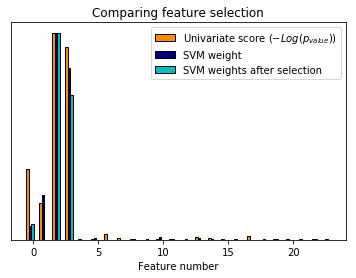

In [34]:
from sklearn import datasets ,svm
from sklearn.feature_selection import SelectPercentile,f_classif

# import some data to play with
iris  = datasets.load_iris()

E = np.random.uniform(0,0.1,size=(len(iris.data),20))

X = np.hstack((iris.data, E))
y = iris.target

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

#                       
selector = SelectPercentile(f_classif,percentile=10)
selector.fit(X,y) 
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices -.45,scores,width=.2,label='Univariate score ($-Log(p_{value})$)',
       color='darkorange',edgecolor='black')
                      
#compare to the weight of an svm
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

svm_weights = (clf.coef_ **2).sum(axis=0)
svm_weights /= svm_weights.max()
plt.bar(X_indices - .25,svm_weights,width=.2,label='SVM weight',color='navy',
       edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X),y)
                      
svm_weights_selected = (clf_selected.coef_ ** 2 ).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05,svm_weights_selected,
       width=.2,label='SVM weights after selection',color='c',edgecolor='black')

plt.title('Comparing feature selection')
plt.xlabel('Feature number') 
plt.yticks(())                      
plt.axis('tight')                      
plt.legend(loc='upper right')                      
plt.show()                      
                      
                      
                      

In [35]:
clf_selected.coef_ 

array([[ 0.        , -1.1       , -0.7       ],
       [ 0.04711426, -0.61248534, -0.30624267],
       [ 0.65934887, -2.0471624 , -1.85934887]])

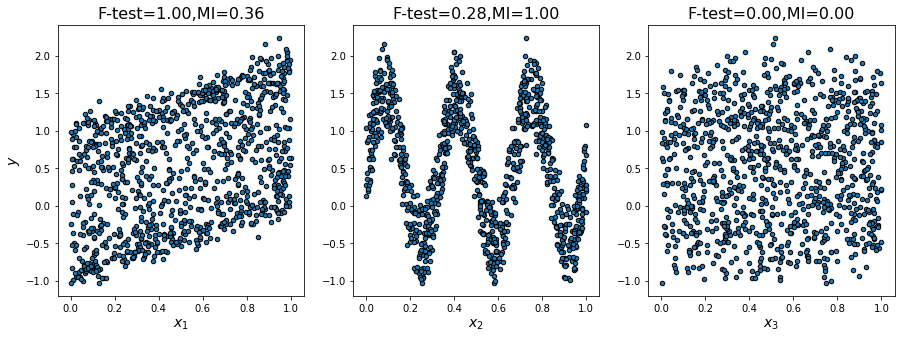

In [37]:
from sklearn.feature_selection import f_regression,mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000,3)
y = X[:,0] + np.sin(6 * np.pi * X[:,1]) + 0.1 * np.random.randn(1000)

f_test,_ = f_regression(X,y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X,y)
mi /= np.max(mi)

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(X[:,i],y,edgecolor='black',s=20)
    plt.xlabel('$x_{}$'.format(i+1),fontsize=14)
    if i ==0:
        plt.ylabel('$y$',fontsize=14)
    plt.title('F-test={:.2f},MI={:.2f}'.format(f_test[i],mi[i]),fontsize=16)
    
plt.show()   

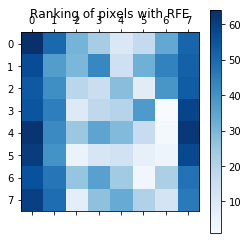

In [39]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE

#load the data
digits = load_digits()
X = digits.images.reshape((len(digits.images),-1))
y = digits.target

# create the rfe objectand rank each picel 
svc = SVC(kernel='linear',C=1)
rfe = RFE(estimator=svc,n_features_to_select=1,step=1)
rfe.fit(X,y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

#plot the pixel ranking
plt.matshow(ranking,cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Ranking of pixels with RFE')
plt.show()


Optimal number of features : 3


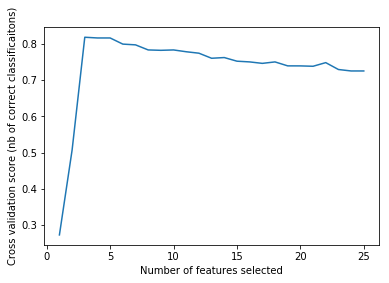

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# build a classification task using 3 informative features
X,y = make_classification(n_samples=1000,n_features=25,n_informative=3,
                         n_redundant=2,n_repeated=0,n_classes=8,
                         n_clusters_per_class=1,random_state=0)
# create the rfe object and compute a cross-validated score
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc,step=1,cv=StratifiedKFold(2),scoring='accuracy')
rfecv.fit(X,y)

print('Optimal number of features : %d'%rfecv.n_features_)

# plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classificaitons)')
plt.plot(range(1,len(rfecv.grid_scores_) +1),rfecv.grid_scores_)
plt.show()

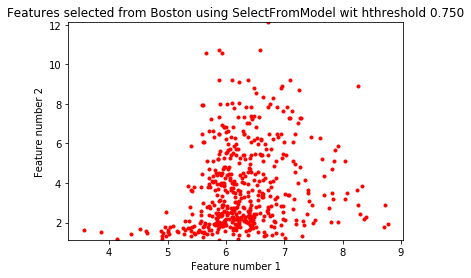

In [46]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV,Lasso

# laod the boston dataset
boston = load_boston()
X,y = boston['data'],boston['target']

# 
clf = LassoCV()

sfm = SelectFromModel(clf,threshold=0.25)
sfm.fit(X,y)
n_features = sfm.transform(X).shape[1]

# fitting
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    
#plot the selected two feature from X
plt.title('Features selected from Boston using SelectFromModel wit h'
         'threshold %.3f'%sfm.threshold)
feature1 = X_transform[:,0]
feature2 = X_transform[:,1]
plt.plot(feature1,feature2,'r.')
plt.xlabel('Feature number 1')
plt.ylabel('Feature number 2')
plt.ylim([np.min(feature2),np.max(feature2)])
plt.show()


In [43]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X,y = iris.data,iris.target
X.shape

(150, 4)

In [44]:
lsvc = LinearSVC(C=0.01,penalty='l1',dual=False).fit(X,y)
model = SelectFromModel(lsvc,prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X,y = iris.data,iris.target
X.shape

(150, 4)

In [48]:
clf = ExtraTreesClassifier()
clf = clf.fit(X,y)
clf.feature_importances_

array([ 0.14613064,  0.03950861,  0.43463436,  0.37972639])

In [49]:
model = SelectFromModel(clf,prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [53]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

Semi-Supervised


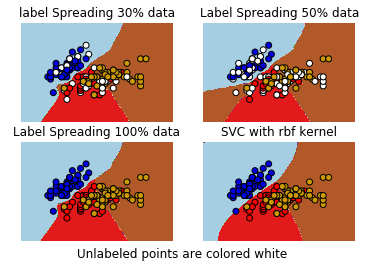

In [4]:
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(0)

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

h = 0.02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y))<0.5] = -1

ls30 = (label_propagation.LabelSpreading().fit(X,y_30),y_30)
ls50 = (label_propagation.LabelSpreading().fit(X,y_50),y_50)
ls100 = (label_propagation.LabelSpreading().fit(X,y),y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X,y),y)

#create a mesh to plot in
x_min,x_max = X[:,0].min() -1,X[:,0].max() +1
y_min,y_max = X[:,1].min() -1,X[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# titles for plots
titles = ['label Spreading 30% data',
         'Label Spreading 50% data',
         'Label Spreading 100% data',
         'SVC with rbf kernel']
color_map = {-1:(1,1,1),0:(0,0,0.9),1:(1,0,0),2:(.8,.6,0)}

for i,(clf,y_train) in enumerate((ls30,ls50,ls100,rbf_svc)):
    plt.subplot(2,2,i+1)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired)
    plt.axis('off')
    
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:,0],X[:,1],c=colors,edgecolors='k')
    plt.title(titles[i])
    
plt.suptitle('Unlabeled points are colored white',y=0.1)
plt.show()
    


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

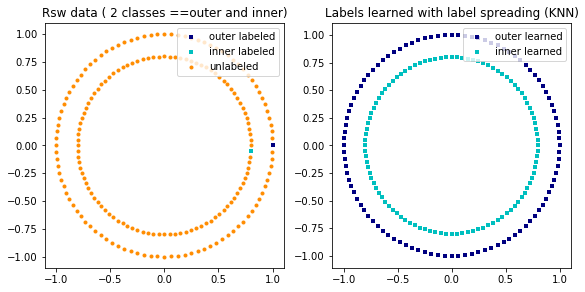

In [6]:
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles

#generate ring with inner  box
n_samples = 200
X,y = make_circles(n_samples=n_samples,shuffle=False)
outer,inner = 0,1
labels = -np.ones(n_samples)
labels[0] = outer
labels[-1] = inner

# learn with labelSpreading
label_spread = label_propagation.LabelSpreading(kernel='knn',alpha=0.8)
label_spread.fit(X,labels)

#plot output labels
output_labels = label_spread.transduction_
plt.figure(figsize=(8.5,4))
plt.subplot(1,2,1)
plt.scatter(X[labels ==outer,0],X[labels==outer,1],color='navy',marker='s',
           lw=0,label='outer labeled',s=10)
plt.scatter(X[labels==inner,0],X[labels==inner,1],color='c',
           marker='s',lw=0,label='inner labeled',s=10)
plt.scatter(X[labels==-1,0],X[labels==-1,1],color='darkorange',marker='.',
           label='unlabeled')
plt.legend(scatterpoints=1,shadow=False,loc='upper right')
plt.title('Raw data ( 2 classes ==outer and inner)')

plt.subplot(1,2,2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers,0],X[outer_numbers,1],color='navy',marker='s',
           lw=0,s=10,label='outer learned')
plt.scatter(X[inner_numbers,0],X[inner_numbers,1],color='c',marker='s',
           lw=0,s=10,label='inner learned')
plt.legend(scatterpoints=1,shadow=False,loc='upper right')
plt.title('Labels learned with label spreading (KNN)')

plt.subplots_adjust(left=0.07,bottom=0.07,right=0.93,top=0.92)
plt.show()


In [8]:
len(y)

200

In [16]:
np.where(np.asarray(output_labels)==1)

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199], dtype=int64),)

E:\anaconda\anaconda\lib\site-packages\sklearn\semi_supervised\label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
E:\anaconda\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 0 ______________________________________________________________________
Label Spreading model: 10 labeled & 320 unlabeled (330 total)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        24
          1       0.51      0.86      0.64        29
          2       0.83      0.97      0.90        31
          3       0.00      0.00      0.00        28
          4       0.00      0.00      0.00        27
          5       0.85      0.49      0.62        35
          6       0.84      0.95      0.89        40
          7       0.70      0.92      0.80        36
          8       0.57      0.76      0.65        33
          9       0.41      0.86      0.55        37

avg / total       0.51      0.62      0.54       320

Confusion matrix
[[25  3  0  0  0  0  1]
 [ 1 30  0  0  0  0  0]
 [ 0  0 17  7  0  1 10]
 [ 2  0  0 38  0  0  0]
 [ 0  3  0  0 33  0  0]
 [ 8  0  0  0  0 25  0]
 [ 0  0  3  0  0  2 32]]


E:\anaconda\anaconda\lib\site-packages\ipykernel\__main__.py:80: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


Iteration 1 ______________________________________________________________________
Label Spreading model: 15 labeled & 315 unlabeled (330 total)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        24
          1       0.51      0.75      0.61        28
          2       0.91      0.97      0.94        31
          3       0.00      0.00      0.00        28
          4       0.00      0.00      0.00        27
          5       0.84      0.97      0.90        33
          6       1.00      0.95      0.97        40
          7       0.75      0.92      0.83        36
          8       0.46      0.81      0.59        31
          9       0.43      0.78      0.56        37

avg / total       0.53      0.66      0.58       315

Confusion matrix
[[21  0  0  0  0  6  1]
 [ 1 30  0  0  0  0  0]
 [ 0  0 32  0  0  0  1]
 [ 2  0  0 38  0  0  0]
 [ 0  3  0  0 33  0  0]
 [ 6  0  0  0  0 25  0]
 [ 0  0  6  0  0  2 29]]
Iteration 2 __________________

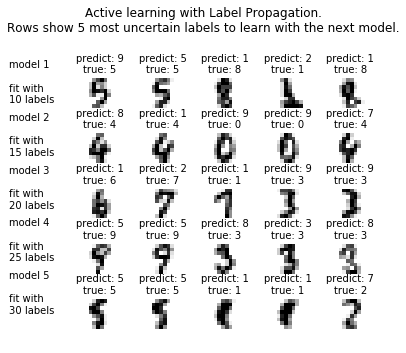

In [25]:
from scipy import stats
from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import classification_report,confusion_matrix

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 10
max_iterations = 5

unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()

for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels,
                          labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print("Label Spreading model: %d labeled & %d unlabeled (%d total)"
          % (n_labeled_points, n_total_samples - n_labeled_points,
             n_total_samples))

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(
        lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([])
   
    # for more than 5 iterations, visualize the gain only on the first 5
    if i < 5:
        f.text(.05, (1 - (i + 1) * .183),
               "model %d\n\nfit with\n%d labels" %
               ((i + 1), i * 5 + 10), size=10)
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation='none')
            sub.set_title("predict: %i\ntrue: %i" % (
                lp_model.transduction_[image_index], y[image_index]), size=10)
            sub.axis('off')

        # labeling 5 points, remote from labeled set
        delete_index, = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)

f.suptitle("Active learning with Label Propagation.\nRows show 5 most "
           "uncertain labels to learn with the next model.", y=1.15)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2,
                    hspace=0.85)
plt.show()

In [29]:
lp_model.label_distributions_

array([[  2.78001354e-153,   5.72305415e-087,   1.00000000e+000, ...,
          4.84824719e-105,   5.42170527e-120,   2.64180740e-108],
       [  4.78074646e-131,   1.57250089e-093,   5.84442697e-104, ...,
          4.06779277e-134,   1.00000000e+000,   2.54360399e-119],
       [  5.11317390e-149,   9.68253631e-072,   1.00000000e+000, ...,
          7.38163866e-090,   5.12951623e-087,   1.20764228e-142],
       ..., 
       [  2.12605590e-172,   1.00000000e+000,   6.29097370e-088, ...,
          8.39649634e-172,   1.01771513e-108,   3.18221153e-166],
       [  1.00000000e+000,   3.64557097e-112,   1.27993358e-149, ...,
          1.30922817e-152,   2.92903350e-090,   2.38982916e-067],
       [  3.80556423e-099,   1.72114006e-061,   8.83606004e-082, ...,
          2.51825490e-107,   1.00000000e+000,   2.53998892e-087]])

In [38]:
help(stats.distributions.entropy)


Help on function entropy in module scipy.stats._distn_infrastructure:

entropy(pk, qk=None, base=None)
    Calculate the entropy of a distribution for given probability values.
    
    If only probabilities `pk` are given, the entropy is calculated as
    ``S = -sum(pk * log(pk), axis=0)``.
    
    If `qk` is not None, then compute the Kullback-Leibler divergence
    ``S = sum(pk * log(pk / qk), axis=0)``.
    
    This routine will normalize `pk` and `qk` if they don't sum to 1.
    
    Parameters
    ----------
    pk : sequence
        Defines the (discrete) distribution. ``pk[i]`` is the (possibly
        unnormalized) probability of event ``i``.
    qk : sequence, optional
        Sequence against which the relative entropy is computed. Should be in
        the same format as `pk`.
    base : float, optional
        The logarithmic base to use, defaults to ``e`` (natural logarithm).
    
    Returns
    -------
    S : float
        The calculated entropy.



In [39]:
x = np.arange(9.).reshape(3, 3)
np.where( x > 5 )

(array([2, 2, 2], dtype=int64), array([0, 1, 2], dtype=int64))

In [40]:
x

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

Isotonic regression


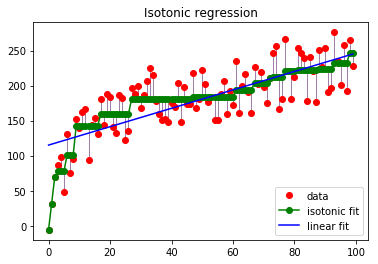

In [4]:
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50,50,size=(n,)) + 50. * np.log(1 + np.arange(n))

# fit isotonicregression and linearregression models
ir = IsotonicRegression()
y_ = ir.fit_transform(x,y)

lr = LinearRegression()
lr.fit(x[:,np.newaxis],y)

# plot the result
segments = [[[i,y[i]],[i,y_[i]]] for i in range(n)]
lc = LineCollection(segments,zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))

fig = plt.figure()
plt.plot(x,y,'r.',markersize=12)
plt.plot(x,y_,'g.-',markersize=12)
plt.plot(x,lr.predict(x[:,np.newaxis]),'b-')
plt.gca().add_collection(lc)
plt.legend(('data','isotonic fit','linear fit'),loc='lower right')
plt.title('Isotonic regression')
plt.show()



Probability calibration

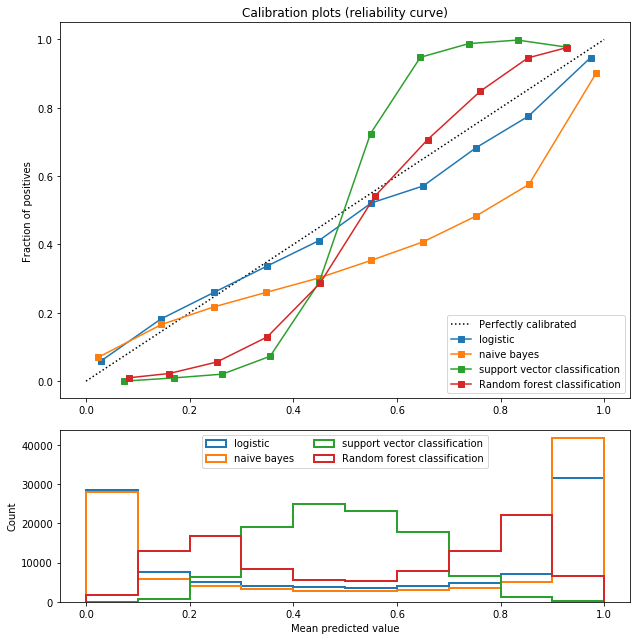

In [7]:
np.random.seed(0)

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

X,y = datasets.make_classification(n_samples=100000,n_features=20,
                                  n_informative=2,n_redundant=2)
train_samples = 100

X_train ,X_test = X[:train_samples],X[train_samples:]
y_train ,y_test = y[:train_samples],y[train_samples:]

# create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

# plot calibration plots
plt.figure(figsize=(9,9))
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=2)
ax2 = plt.subplot2grid((3,1),(2,0))

ax1.plot([0,1],[0,1],'k:',label='Perfectly calibrated')
for clf,name in [(lr,'logistic'),(gnb,'naive bayes'),
                (svc,'support vector classification'),
                (rfc,'Random forest classification')]:
    clf.fit(X_train,y_train)
    if hasattr(clf,'predict_proba'):
        prob_pos = clf.predict_proba(X_test)[:,1]
    else:
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min())/(prob_pos.max()-prob_pos.min())
    fraction_of_positives,mean_predicted_value = \
        calibration_curve(y_test,prob_pos,n_bins=10)
    
    ax1.plot(mean_predicted_value,fraction_of_positives,'s-',label='%s'%(name,))
    ax2.hist(prob_pos,range=(0,1),bins=10,label=name,histtype='step',lw=2)
    
ax1.set_ylabel('Fraction of positives')
ax1.set_ylim([-0.05,1.05])
ax1.legend(loc='lower right')
ax1.set_title('Calibration plots (reliability curve)')

ax2.set_xlabel('Mean predicted value')
ax2.set_ylabel('Count')
ax2.legend(loc='upper center',ncol=2)

plt.tight_layout()
plt.show()


Brier scores: ( the smaller the  better)
No callibration : 0.104
with isotonic calibration: 0.084
with sigmoid calibration : 0.109


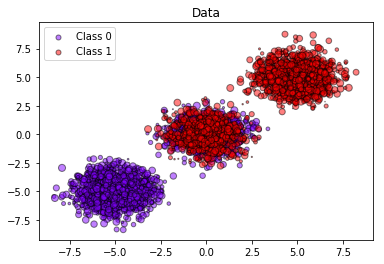

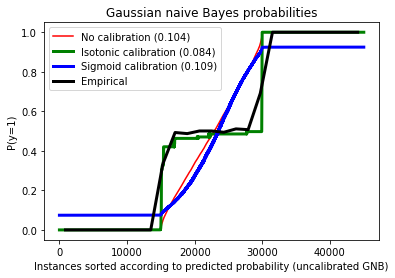

In [9]:
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

n_samples = 50000
n_bins = 3

centers = [(-5,-5),(0,0),(5,5)]
X,y = make_blobs(n_samples=n_samples,n_features=2,cluster_std=1.0,
                centers=centers,shuffle=False,random_state=42)
y[:n_samples//2] = 0
y[n_samples//2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

# split train ,test for calibration
X_train,X_test,y_train,y_test,sw_train,sw_test = train_test_split(X,y,sample_weight,test_size=0.9,random_state=42)

# gaussian naive_bayes with no calibration
clf = GaussianNB()
clf.fit(X_train,y_train)
prob_pos_clf = clf.predict_proba(X_test)[:,1]

# gaussian naive bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf,cv=2,method='isotonic')
clf_isotonic.fit(X_train,y_train,sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:,1]

# gaussian naive_bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf,cv=2,method='sigmoid')
clf_sigmoid.fit(X_train,y_train,sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:,1]

print('Brier scores: ( the smaller the  better)')

clf_score = brier_score_loss(y_test,prob_pos_clf,sw_test)
print('No callibration : %1.3f' % clf_score)

clf_isotonic_score = brier_score_loss(y_test,prob_pos_isotonic,sw_test)
print('with isotonic calibration: %1.3f'%clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test,prob_pos_sigmoid,sw_test)
print('with sigmoid calibration : %1.3f'%clf_sigmoid_score)

# plot the data and predicted probability
plt.figure()
y_unique = np.unique(y)
colors = cm.rainbow(np.linspace(0.0,1.0,y_unique.size))
for this_y,color in zip(y_unique,colors):
    this_X = X_train[y_train == this_y]
    this_sw = sw_train[y_train == this_y]
    plt.scatter(this_X[:,0],this_X[:,1],s = this_sw * 50,c=color,
                alpha=0.5,edgecolor='k',label='Class %s'%this_y)
plt.legend(loc='best')
plt.title('Data')

plt.figure()
order = np.lexsort((prob_pos_clf, ))
plt.plot(prob_pos_clf[order], 'r', label='No calibration (%1.3f)' % clf_score)
plt.plot(prob_pos_isotonic[order], 'g', linewidth=3,
         label='Isotonic calibration (%1.3f)' % clf_isotonic_score)
plt.plot(prob_pos_sigmoid[order], 'b', linewidth=3,
         label='Sigmoid calibration (%1.3f)' % clf_sigmoid_score)
plt.plot(np.linspace(0, y_test.size, 51)[1::2],
         y_test[order].reshape(25, -1).mean(1),
         'k', linewidth=3, label=r'Empirical')
plt.ylim([-0.05, 1.05])
plt.xlabel("Instances sorted according to predicted probability "
           "(uncalibrated GNB)")
plt.ylabel("P(y=1)")
plt.legend(loc="upper left")
plt.title("Gaussian naive Bayes probabilities")

plt.show()

logistic;
	Brier: 0.099
	Precision: 0.872
	Recall : 0.851
	F1: 0.862
Navie bayes;
	Brier: 0.118
	Precision: 0.857
	Recall : 0.876
	F1: 0.867
Navie bayes with isotonic;
	Brier: 0.098
	Precision: 0.883
	Recall : 0.836
	F1: 0.859
Navie bayes with sigmoid;
	Brier: 0.109
	Precision: 0.861
	Recall : 0.871
	F1: 0.866
logistic;
	Brier: 0.099
	Precision: 0.872
	Recall : 0.851
	F1: 0.862
SVC;
	Brier: 0.163
	Precision: 0.872
	Recall : 0.852
	F1: 0.862
SVC with isotonic;
	Brier: 0.100
	Precision: 0.853
	Recall : 0.878
	F1: 0.865
SVC with sigmoid;
	Brier: 0.099
	Precision: 0.874
	Recall : 0.849
	F1: 0.861


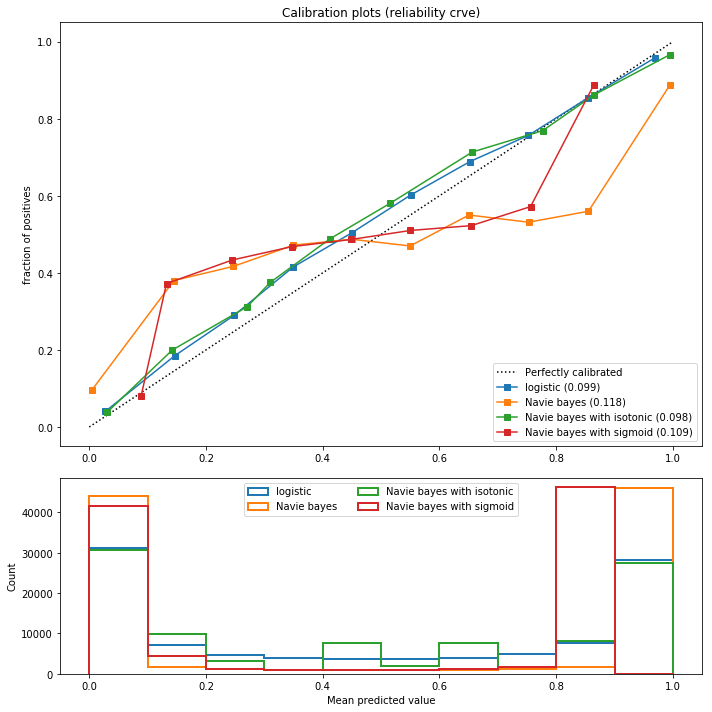

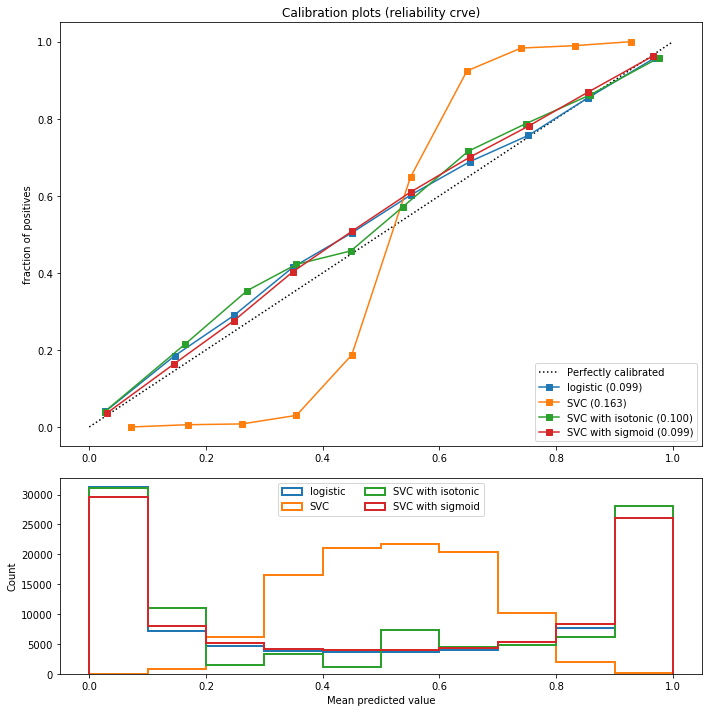

In [6]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss , precision_score,recall_score,f1_score
from sklearn.calibration import CalibratedClassifierCV,calibration_curve
from sklearn.model_selection import train_test_split

# create data
X,y = datasets.make_classification(n_samples=100000,n_features=20,
                                  n_informative=2,n_redundant=10,
                                  random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.99,random_state=42)

def plot_calibration_curve(est,name,fig_index):
    # calibration with isotonic calibration
    isotonic = CalibratedClassifierCV(est,cv=2,method='isotonic')
    # calibration with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est,cv=2,method='sigmoid')
    # logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1,solver='lbfgs')
    
    fig = plt.figure(fig_index,figsize=(10,10))
    ax1 = plt.subplot2grid((3,1),(0,0),rowspan=2)
    ax2 = plt.subplot2grid((3,1),(2,0))
    
    ax1.plot([0,1],[0,1],'k:',label='Perfectly calibrated')
    for clf,name in [(lr,'logistic'),(est,name),
                     (isotonic ,name+' with isotonic'),
                    (sigmoid,name+' with sigmoid')]:
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf,'predict_proba'):
            prob_pos = clf.predict_proba(X_test)[:,1]
        else:
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        clf_score = brier_score_loss(y_test,prob_pos,pos_label=y.max())
        print('%s;'%name)
        print('\tBrier: %1.3f'%clf_score)
        print('\tPrecision: %1.3f'%precision_score(y_test,y_pred))
        print('\tRecall : %1.3f'%recall_score(y_test,y_pred))
        print('\tF1: %1.3f' % f1_score(y_test,y_pred))
        
        fraction_of_positives,mean_predicted_value = \
            calibration_curve(y_test,prob_pos,n_bins=10)
        ax1.plot(mean_predicted_value,fraction_of_positives,'s-',
                 label='%s (%1.3f)' %(name,clf_score))
        ax2.hist(prob_pos,range=(0,1),bins=10,label=name,histtype='step',lw=2)
        
    ax1.set_ylabel('fraction of positives')
    ax1.set_ylim([-0.05,1.05])
    ax1.legend(loc='lower right')
    ax1.set_title('Calibration plots (reliability crve)')
    
    ax2.set_xlabel('Mean predicted value')
    ax2.set_ylabel('Count')
    ax2.legend(loc='upper center',ncol=2)
    
    plt.tight_layout()
    
plot_calibration_curve(GaussianNB(),'Navie bayes',1)
plot_calibration_curve(LinearSVC(),'SVC',2)

plt.show()
    

Log-loss of 
* uncalibrated classifier trained on 800 datapoints: 1.280
* classifier trained on 600 datapoints and calibrated on 200 datapoints:0.534


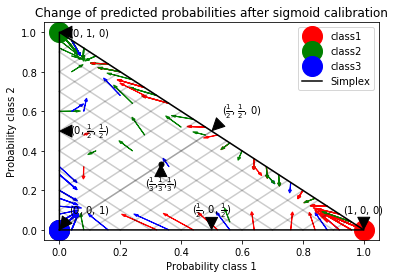

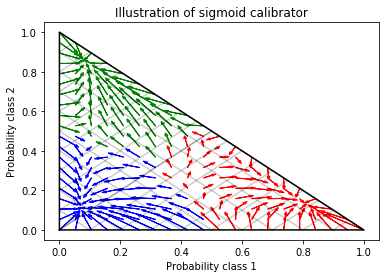

In [9]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

np.random.seed(0)

#generat data
X,y = make_blobs(n_samples=1000,n_features=2,random_state=42,cluster_std=5.0)

X_train,y_train = X[:600],y[:600]
X_valid,y_valid = X[600:800],y[600:800]
X_train_valid,y_train_valid = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

# train
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid,y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test,clf_probs)

#train 
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train,y_train)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
sig_clf.fit(X_valid,y_valid)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(y_test,sig_clf_probs)

# plot changes in predicted probabilities voa arrows
plt.figure(0)
colors = ['r','g','b']
for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i,0],clf_probs[i,1],
             sig_clf_probs[i,0] - clf_probs[i,0],
             sig_clf_probs[i,1] - clf_probs[i,1],
             color=colors[y_test[i]],head_width=1e-2)
#plot perfect predictions
plt.plot([1,0],[0,0],'ro',ms=20,label='class1')
plt.plot([0,0],[1,0],'go',ms=20,label='class2')
plt.plot([0,0],[0,0],'bo',ms=20,label='class3')

#plot boundaries of unit simplex
plt.plot([0.0,1,0,0],[0,0,1,0],'k',label='Simplex')

#annotate points on the simplex
plt.annotate(r'($\frac{1}{3}$,$\frac{1}{3}$,$\frac{1}{3}$)',
            xy =(1.0/3,1.0/3),xytext=(1./3,.23),xycoords='data',
            arrowprops=dict(facecolor='black',shrink=0.05),
            horizontalalignment='center',verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $0$, $\frac{1}{2}$)',
             xy=(.5, .0), xytext=(.5, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)',
             xy=(.0, .5), xytext=(.1, .5), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)',
             xy=(.5, .5), xytext=(.6, .6), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)',
             xy=(0, 0), xytext=(.1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)',
             xy=(1, 0), xytext=(1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)',
             xy=(0, 1), xytext=(.1, 1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')

# add grid
plt.grid('off')
for x in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    plt.plot([0,x],[x,0],'k',alpha=0.2)
    plt.plot([0,0 + (1-x)/2],[x,x+(1-x)/2],'k',alpha=0.2)
    plt.plot([x,x+(1-x)/2],[0,0+(1-x)/2],'k',alpha=0.2)
    
plt.title('Change of predicted probabilities after sigmoid calibration')
plt.xlabel('Probability class 1')
plt.ylabel('Probability class 2')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.legend(loc='best')

print('Log-loss of ')
print('* uncalibrated classifier trained on 800 datapoints: %.3f'%score)
print('* classifier trained on 600 datapoints and calibrated on 200 datapoints:%.3f'% sig_score)

#illustrate calibrate
plt.figure(1)
#generate grid over 2-simplex
p1d = np.linspace(0,1,20)
p0,p1 = np.meshgrid(p1d,p1d)
p2 = 1 - p0 -p1
p = np.c_[p0.ravel(),p1.ravel(),p2.ravel()]
p = p[p[:,2] >= 0]

calibrated_classifier = sig_clf.calibrated_classifiers_[0]
prediction = np.vstack([calibrator.predict(this_p) for calibrator,this_p in zip(calibrated_classifier.calibrators_,p.T)]).T
prediction /= prediction.sum(axis=1)[:,None]

# plot modifications of calibrator
for i in range(prediction.shape[0]):
    plt.arrow(p[i,0],p[i,1],prediction[i,0]-p[i,0],prediction[i,1]-p[i,1],
             head_width=1e-2, color=colors[np.argmax(p[i])])
    
# plot bounsaries of unit simplex
plt.plot([0,1,0,0],[0,0,1,0],'k',label='simplex')

plt.grid('off')
for x in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    plt.plot([0,x],[x,0],'k',alpha=0.2)
    plt.plot([0,0+(1-x)/2],[x,x+(1-x)/2],'k',alpha=0.2)
    plt.plot([x,x+(1-x)/2],[0,0+(1-x)/2],'k',alpha=0.2)
plt.title('Illustration of sigmoid calibrator')
plt.xlabel('Probability class 1')
plt.ylabel('Probability class 2')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.show()

In [15]:
sig_clf.calibrated_classifiers_[0].calibrators_

[_SigmoidCalibration(), _SigmoidCalibration(), _SigmoidCalibration()]

Neural network models (supervised)

In [9]:
from sklearn.neural_network import MLPClassifier
X = [[0,0.],[1.,1.]]
y = [0,1]
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,
                  hidden_layer_sizes=(5,2),random_state=1 )
clf.fit(X,y)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [11]:
clf.coefs_,clf.intercepts_

([array([[-0.14196276, -0.02104562, -0.85522848, -3.51355396, -0.60434709],
         [-0.69744683, -0.9347486 , -0.26422217, -3.35199017,  0.06640954]]),
  array([[ 0.29164405, -0.14147894],
         [ 2.39665167, -0.6152434 ],
         [-0.51650256,  0.51452834],
         [ 4.0186541 , -0.31920293],
         [ 0.32903482,  0.64394475]]),
  array([[-4.53025854],
         [-0.86285329]])],
 [array([-0.14962269,  0.75950271, -0.5472481 ,  6.92417703, -0.87510813]),
  array([-0.47635084, -0.76834882]),
  array([ 8.53354251])])

In [12]:
clf.predict([[2.,2.],[-1,-2]])

array([1, 0])

In [13]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [14]:
clf.predict_proba([[2.,2.],[1.,2.]])

array([[  1.96718015e-04,   9.99803282e-01],
       [  1.96718015e-04,   9.99803282e-01]])


learning on dataset iris
training: constant learning-rate


E:\anaconda\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.973333
Training set loss: 0.172988
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.050260
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.050277
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.988447
training: inv-scaling with momentum
Training set score: 0.826667
Training set loss: 0.579537
training: inv-scaling with Nesterov's momentum
Training set score: 0.826667
Training set loss: 0.580582
training: adam
Training set score: 0.980000
Training set loss: 0.046248

learning on dataset digits
training: constant learning-rate


E:\anaconda\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.964942
Training set loss: 0.192680
training: constant with momentum
Training set score: 0.997774
Training set loss: 0.031172
training: constant with Nesterov's momentum
Training set score: 0.997774
Training set loss: 0.032229
training: inv-scaling learning-rate
Training set score: 0.651085
Training set loss: 1.843756
training: inv-scaling with momentum
Training set score: 0.915415
Training set loss: 0.283022
training: inv-scaling with Nesterov's momentum
Training set score: 0.910963
Training set loss: 0.309281
training: adam
Training set score: 0.998331
Training set loss: 0.031719

learning on dataset circles
training: constant learning-rate
Training set score: 0.830000
Training set loss: 0.681498
training: constant with momentum
Training set score: 0.940000
Training set loss: 0.196001
training: constant with Nesterov's momentum
Training set score: 0.920000
Training set loss: 0.195875
training: inv-scaling learning-rate
Training set score: 0.500000
Training set lo

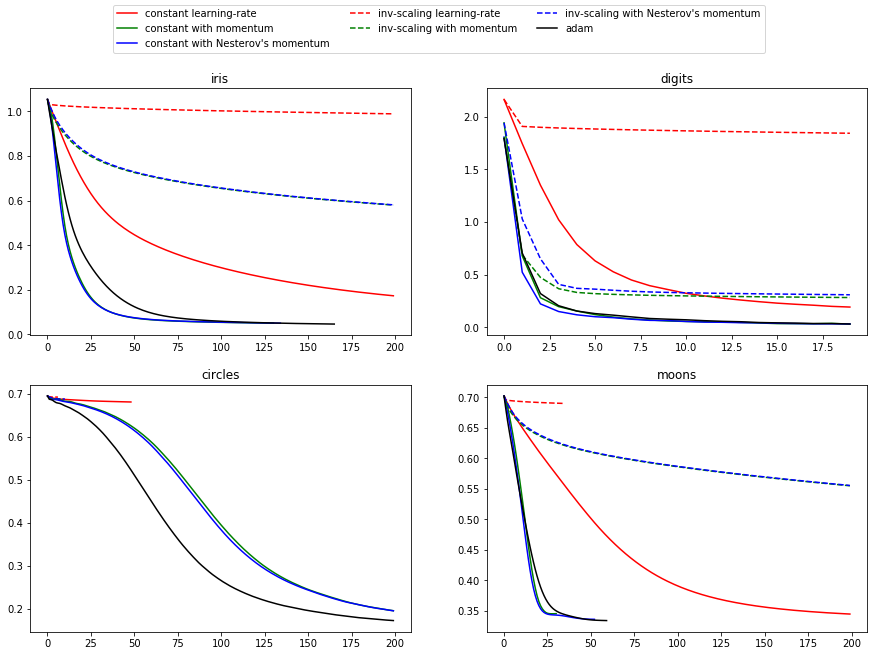

In [18]:
 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 20
    else:
        max_iter = 200

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)
 

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Iteration 1, loss = 0.29846887
Iteration 2, loss = 0.14028882
Iteration 3, loss = 0.10489387
Iteration 4, loss = 0.08643775
Iteration 5, loss = 0.07478438
Iteration 6, loss = 0.06600423
Iteration 7, loss = 0.05986465
Iteration 8, loss = 0.05403573
Iteration 9, loss = 0.04885303
Iteration 10, loss = 0.04478293


E:\anaconda\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Traning set score: 0.987150
Test set score: 0.988300


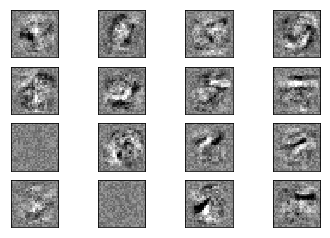

In [22]:
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata('MNIST original',data_home='E:/python_work/handson_ml/datasets')

X,y = mnist.data / 255, mnist.target
X_train,X_test = X[:60000],X[60000:]
y_train,y_test = y[:60000],y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,),max_iter=10,alpha=1e-4,
                   solver='sgd',verbose=10,tol=1e-4,random_state=1,
                   learning_rate_init=.1)

mlp.fit(X,y)
print('Traning set score: %f'% mlp.score(X_train,y_train))
print('Test set score: %f' % mlp.score(X_test,y_test))

fig,axes = plt.subplots(4,4)
vmin,vmax = mlp.coefs_[0].min() ,mlp.coefs_[0].max()
for coef,ax in zip(mlp.coefs_[0].T,axes.ravel()):
    ax.matshow(coef.reshape(28,28),cmap=plt.cm.gray,vmin=.5 * vmin,
              vmax = .5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()


E:\anaconda\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


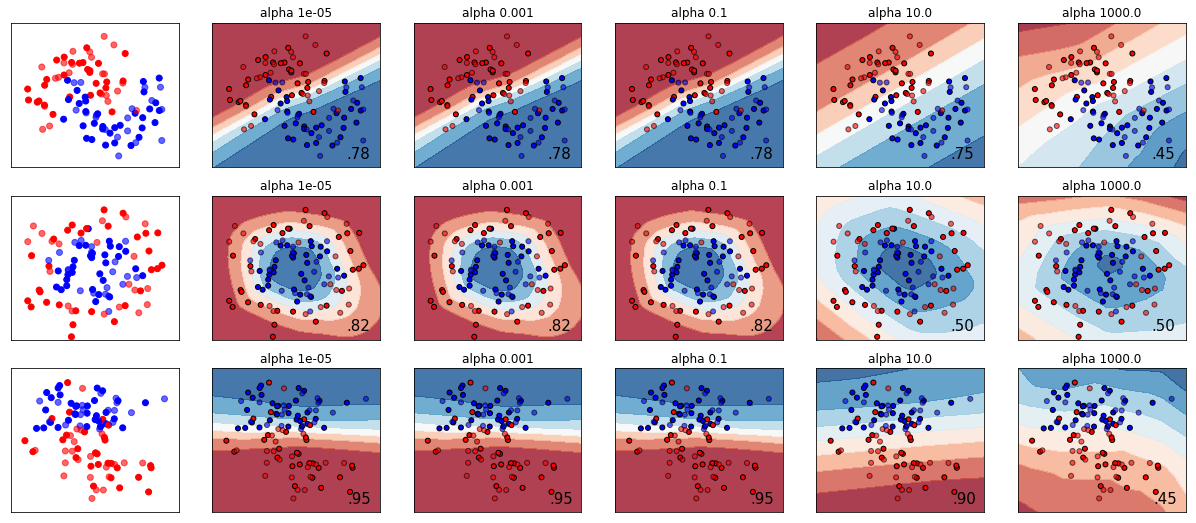

In [25]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neural_network import MLPClassifier

h = .02

alphas = np.logspace(-5,3,5)
names = []
for i in alphas:
    names.append('alpha '+str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i,random_state=1))

X,y = make_classification(n_features=2,n_redundant=0,n_informative=2,
                          random_state=0,n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X,y)

datasets = [make_moons(noise=0.3,random_state=0),
           make_circles(noise=0.2,factor=0.5,random_state=1),
           linearly_separable]

figure = plt.figure(figsize=(17,9))
i = 1

for X,y in datasets:
    X = StandardScaler().fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
    
    x_min,x_max = X[:,0].min() - .5,X[:,0].max() + 0.5
    y_min,y_max = X[:,0].min() - .5,X[:,1].max() + 0.5
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
    
    #just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000','#0000FF'])
    ax = plt.subplot(len(datasets),len(classifiers)+1,i)
    #plot the training points
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)
    # and test points
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name,clf in zip(names,classifiers):
        ax = plt.subplot(len(datasets),len(classifiers)+1,i)
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        
        if hasattr(clf,'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        
        Z = Z.reshape(xx.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=0.8)
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                  edgecolors='black',s=25)
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                  alpha=0.6,edgecolors='black',s=25)
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - 0.3,yy.min() + 0.3, ('%.2f'% score).lstrip('0'),
                 size=15,horizontalalignment='right')
        i += 1
    
figure.subplots_adjust(left=.02,right=.98)
plt.show()
        

In [26]:
X = [[0.,0.],[1.,1.]]
y = [0,1]
clf =  MLPClassifier(hidden_layer_sizes=(15,),random_state=1,max_iter=1,
                warm_start=True)
for i in range(10):
    clf.fit(X,y)

E:\anaconda\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
